# HR Analytics Project- Understanding the Attrition in HR

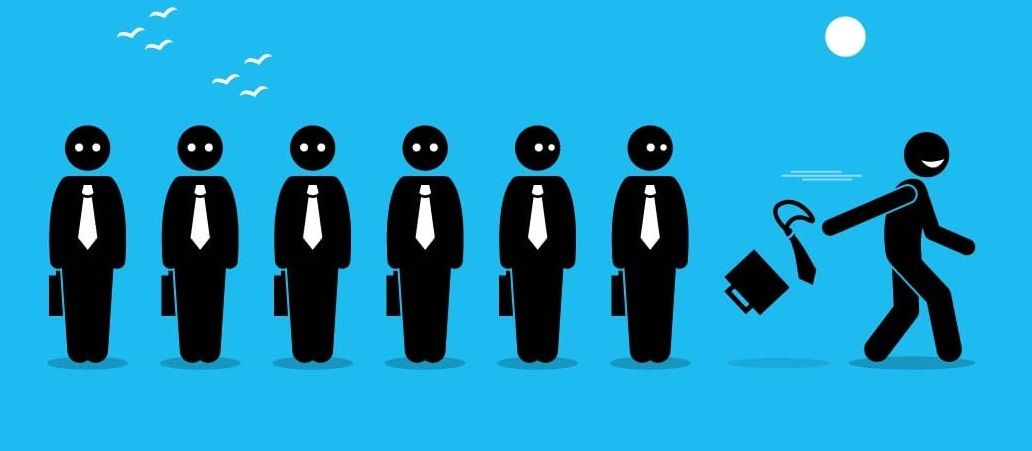

### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing Libraries

In [1]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler

# To display all columns
pd.pandas.set_option('display.max_columns',None)

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# -------------------------------Getting to Know About Data---------------------------------------


# Reading File

In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## 1. Overall Data Analysis

In [5]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (1470, 35)


In [6]:
df.shape

(1470, 35)

In [7]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [8]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1465       Married           2571        12290                   4      Y   
1466       Married           9991        21457                   4      Y   
1467       Married           6142         5174                   1      Y   
1468       Married           5390        13243                   2      Y   
1469       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465       No                 17                  3                         3   
1466       No                 15                  3                         1   
1467      Yes                 20                  4                         2   
1468       No                 14                  3                         4   
1469       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [9]:
df.sample(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
1137   22        No         Non-Travel        457  Research & Development   
1224   26        No      Travel_Rarely        390  Research & Development   
454    29        No      Travel_Rarely        232  Research & Development   
90     40        No  Travel_Frequently        530  Research & Development   
829    33       Yes      Travel_Rarely        603                   Sales   
450    31        No      Travel_Rarely        828                   Sales   
1437   39        No         Non-Travel        105  Research & Development   
1401   55        No      Travel_Rarely        189         Human Resources   
542    38        No      Travel_Rarely        168  Research & Development   
184    53        No      Travel_Rarely       1084  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1137                26          2             Other              1   
1224                17          4           Medical              1   
454                 19          3  Technical Degree              1   
90                   1          4     Life Sciences              1   
829                  9          4         Marketing              1   
450                  2          1     Life Sciences              1   
1437                 9          3     Life Sciences              1   
1401                26          4   Human Resources              1   
542                  1          3     Life Sciences              1   
184                 13          2           Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
1137            1605                        2  Female          85   
1224            1718                        4    Male          62   
454              611                        4    Male          34   
90               119                        3    Male          78   
829             1157                        1  Female          77   
450              604                        2    Male          77   
1437            2022                        4    Male          87   
1401            1973                        3    Male          71   
542              743                        3  Female          81   
184              250                        4  Female          57   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1137               2         1         Research Scientist                3   
1224               1         1      Laboratory Technician                3   
454                3         2     Manufacturing Director                4   
90                 2         4  Healthcare Representative                2   
829                3         2            Sales Executive                1   
450                3         2            Sales Executive                4   
1437               3         5                    Manager                4   
1401               4         5                    Manager                2   
542                3         3     Manufacturing Director                3   
184                4         2     Manufacturing Director                1   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1137       Married           2814        10293                   1      Y   
1224       Married           2305         6217                   1      Y   
454       Divorced           4262        22645                   4      Y   
90         Married          13503        14115                   1      Y   
829         Single           8224        18385                   0      Y   
450         Single           6582         8346                   4      Y   
1437        Single          19431        15302                   2      Y   
1401       Married          19636        25811                   4      Y   
542         Single           7861        15397                   4      Y  

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# Removing duplicate values
df.duplicated().sum()

0

### Observation - 
1. There are total 1470 records with 35 columns in each entry.
2. There are total 35 columns as below - 
  - Age: 
  - Attrition: 
  - BusinessTravel: 
  - DailyRate: 
  - Department: 
  - DistanceFromHome: 
  - Education: 
  - EducationField: 
  - EmployeeCount: 
  - EmployeeNumber: 
  - EnvironmentSatisfaction: 
  - Gender: 
  - HourlyRate: 
  - JobInvolvement: 
  - JobLevel: 
  - JobRole: 
  - JobSatisfaction: 
  - MaritalStatus: 
  - MonthlyIncome: 
  - MonthlyRate: 
  - NumCompaniesWorked: 
  - Over18: 
  - OverTime: 
  - PercentSalaryHike: 
  - PerformanceRating: 
  - RelationshipSatisfaction: 
  - StandardHours: 
  - StockOptionLevel: 
  - TotalWorkingYears: 
  - TrainingTimesLastYear: 
  - WorkLifeBalance: 
  - YearsAtCompany: 
  - YearsInCurrentRole: 
  - YearsSinceLastPromotion: 
  - YearsWithCurrManager:
3. There are no duplicate value

## 2. Getting to Know More About Data

In [12]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# 3 Gettting to Know Five Number Summery for Continuous variable¶

In [13]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

### Observations - 
Looking at count column, there are no missing values. There may be outliers, but no missing values in continuous data
1. Age: Average age of employees is 36
2. DailyRate: Average daily rate is 802.49 with min. rate 102 and max. rate is 1499
3. DistanceFromHome:
    - For 50% of employees have office within 7 km.
    - Average distance emlpoyee need to travel to reach company is 9.19
4. Education: Education of employees
5. EmployeeCount: Employee count as 1
6. EmployeeNumber: Employee Number
7. EnvironmentSatisfaction:
    - Average employee satisfication is 2.72
    - 50% of employee has satisfication level less than 3
    - 25% of employee has satisfication level less than 2
8. HourlyRate: Average hourly rate of employee is 65.89
9. JobInvolvement: Average 2.729 with min 1 and max 4
10. JobLevel: 50% of employees has job level 1 and 2
11. JobSatisfaction: Average job satisfication is 2.72
12. MonthlyIncome:
    - Average monthly income is 6502.93
    - 50 % of employees has income less than 4919.0
13. MonthlyRate: Average monthly rate of employee is 14313.103401
14. NumCompaniesWorked: Record having employees with 0 to 9 companies
15. PercentSalaryHike:
    - Average salary hike is 15.20%
    - 50% of emplpyees received, 14 % Salary hike
    - Minimum salary hike is 11% and maximum 25%
16. PerformanceRating:
    - All have performance rating of 3 and 4
17. RelationshipSatisfaction: Average relation satisfaction is 2.71
18. StandardHours: 80 Hours, Constant for all employees
19. StockOptionLevel: Average = 0.79, min = 1 and max = 3
20. TotalWorkingYears:
    - Average working years are 11.27
    - min is 0 and max is 40 years
    - 25% employees has experiance less than 6
    - 25% employees has experiance between 6 and 10
21. TrainingTimesLastYear: Total training time last year
22. WorkLifeBalance: Graded between 1 to 4 with average of 2.76
23. YearsAtCompany: 
    - 25% of employee has 9 to 40 years of experiance in this company
24. YearsInCurrentRole: with average of 4.229
25. YearsSinceLastPromotion: Employee get promotion in every 2 years (Average)
26. YearsWithCurrManager: 25%-25% employees have spent 0-2 and 7-17 years with current manager

# 4 Gettting to Know about Categorical Variable

In [14]:
df.describe(include="O")

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

### Observations - 
There are less than 10 categories in each of qualitative data. This information will help us to plot various plots to undersand data.
1. Attrition: There are only two categories (Yes/No): With mode of "No" having frequency of 1233, for Yes it counts as 337
2. BusinessTravel: Three category, with mode as "Travel_Rarely" with freq. as 1043
3. Department: Three departments, with mode of "Research & Development" with frequency of 961
4. EducationField: 6 Category, with max "Life Sciences" counted 606
5. Gender: 2 cate, with mode of male with 882 count.
6. JobRole: 9 job role, with more sale execuative (326)
7. MaritalStatus: Most of the men working are Marrieed (673)
8. Over18: As per rule/qualification required, all employees must be above 18 years.
9. OverTime: Most of employees are not doing overtime. Only 416 

# 5 Getting to Know About Missing Values

In [15]:
# Feature Wise missing Values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 0 missing values in dataset


### Observation - 
From results we can see that, there are no missing values in dataset

# --------------------------------------------------EDA------------------------------------------------------

# 1 Seperating Data as categorical and Numerical Data

In [17]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [18]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [19]:
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [20]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 9
Total Numerical Features are 26


### Observation - 
1. Total Categorical features are 9
2. Total Numerical Features are 26

# 2 Plotting to understand Data Distribution

No     1233
Yes     237
Name: Attrition, dtype: int64


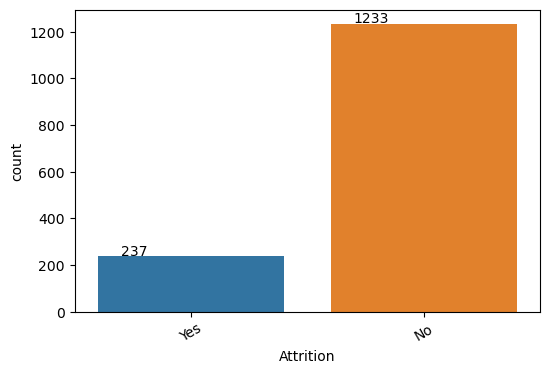

In [21]:
# Countplot for Attrition
plt.figure(dpi=100)
plot = sns.countplot('Attrition',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Attrition.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. 1233 employees havent departed
2. 237 Employees departed from company

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


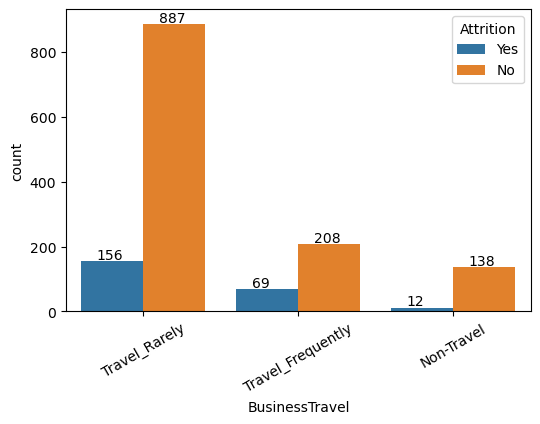

In [22]:
# Countplot for BusinessTravel
plt.figure(dpi=100)
plot = sns.countplot('BusinessTravel',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.BusinessTravel.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
- Employee who travel frequently have more chances of departure (Almost 25%)
- Distribution as 
    1. Travel_Rarely = 1043
    2. Travel_Frequently = 277
    3. Non-Travel = 150

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


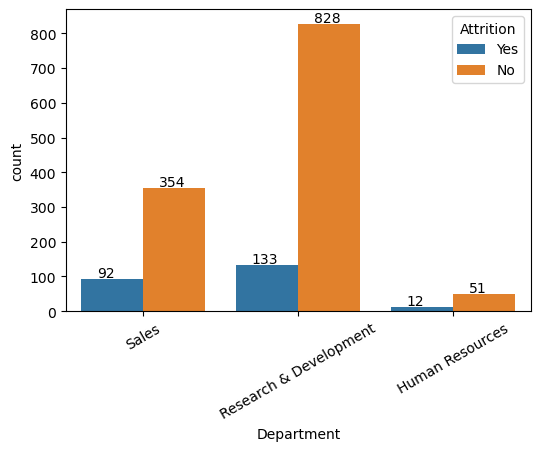

In [23]:
# Countplot for 
plt.figure(dpi=100)
plot = sns.countplot('Department',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Department.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. Almost 33% of employees working in Sales department departed
2. HR and R&D people are less likely to depart
3. Value Count for Each Department as
    - Research & Development =   961
    - Sales                   =  446
    - Human Resources          =  63

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


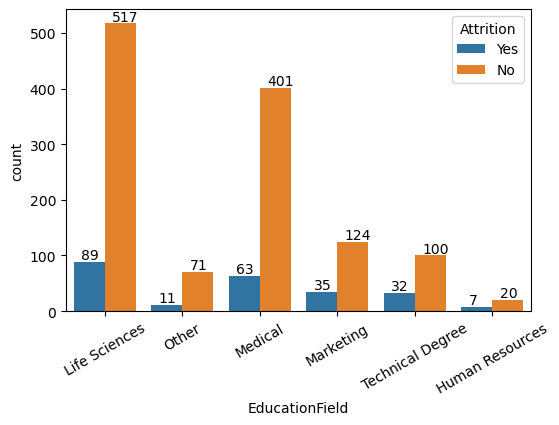

In [24]:
# Countplot for Education Field
plt.figure(dpi=100)
plot = sns.countplot('EducationField',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.EducationField.value_counts())
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. Most of the employees are from Life Sciences and Medical Field, Almost 1070
2. Attrition happens for almost every field. But fot Marketing, HR and Techinical Degree people probability seems higher.

Male      882
Female    588
Name: Gender, dtype: int64


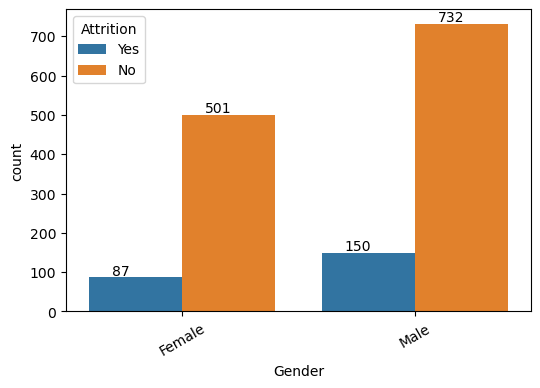

In [25]:
# Countplot for Gender
plt.figure(dpi=100)
plot = sns.countplot('Gender',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Gender.value_counts())
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

In [26]:
print(f'% of Mens Departed = {round((150/882)*100, 2)} %')
print(f'% of Females Departed = {round((87/588)*100, 2)} %')

% of Mens Departed = 17.01 %
% of Females Departed = 14.8 %


### Observation - 
Almost attrition rate is same for both mens and womens. There is slite difference but can be treated as same (Diff 2.8)
1. % of Mens Departed = 17.01 %
2. % of Females Departed = 14.8 %

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


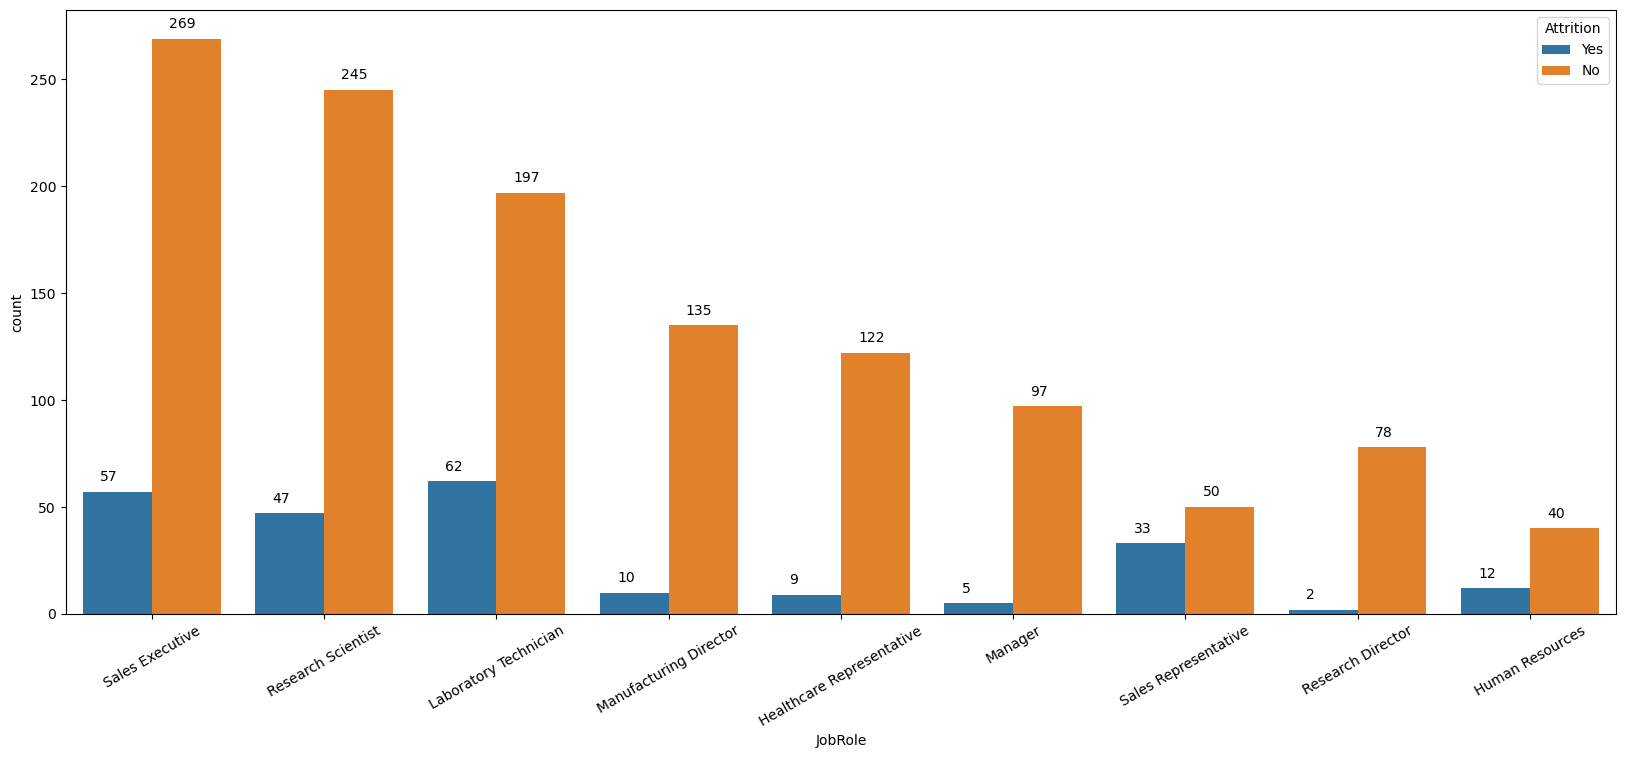

In [27]:
# Countplot for JobRole
plt.figure(dpi=100, figsize=(20, 8))
plot = sns.countplot('JobRole',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.JobRole.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Sales Representative are more likely to depart
1. Lesser chance of departure - Managers, Research Director, Healthcare Representative
2. Higher chance of departure - Research Scientist, Sales Executive, HR, Laboratory Techinician

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


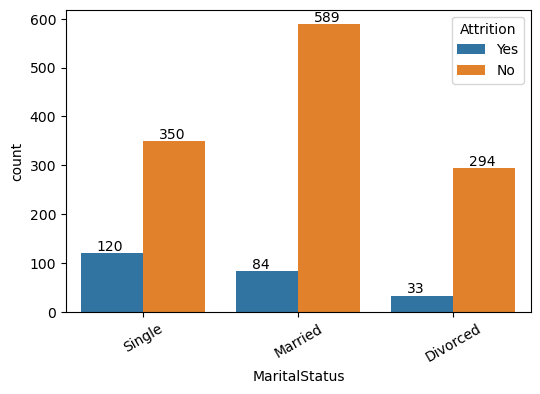

In [28]:
# Countplot for Marrital Status
plt.figure(dpi=100)
plot = sns.countplot('MaritalStatus',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.MaritalStatus.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Chances of facing attrition is more for singles
1. 25% of singles has departed
2. Only 12% of married people opted departure from current organisation
3. Only 10% of Divorsed people opted departure from current organisation

No     1054
Yes     416
Name: OverTime, dtype: int64


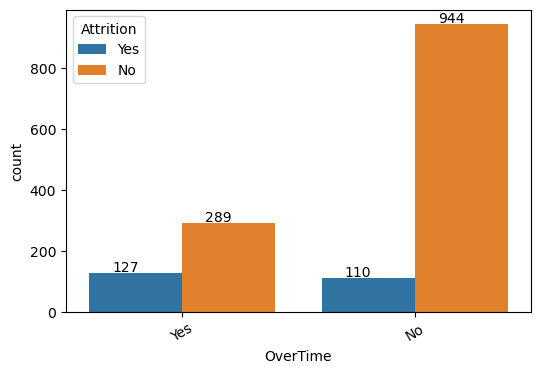

In [29]:
# Countplot for OverTime
plt.figure(dpi=100)
plot = sns.countplot('OverTime',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.OverTime.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. 30% of employees doing over time has more chances of leaving company
2. Out of rest of the emplyees only 10% of employees left company

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


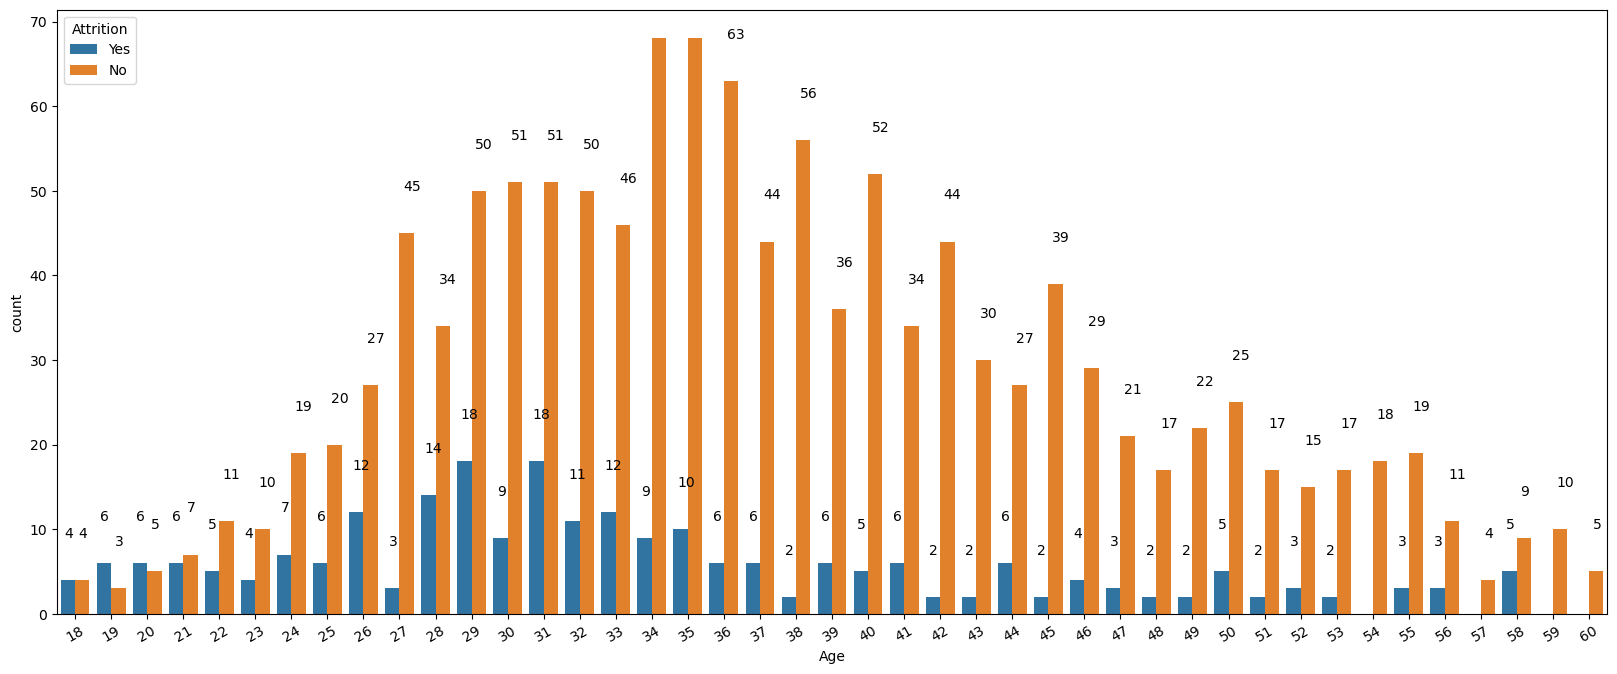

In [30]:
# Countplot for OverTime
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('Age',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Age.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. Employees with age ranging from 18-21 has 50% of chance of departing
2. Employees with age ranging from 22-32 has 20-25% of chance of departing
3. As Age of employee increases, chances of departing decresed

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


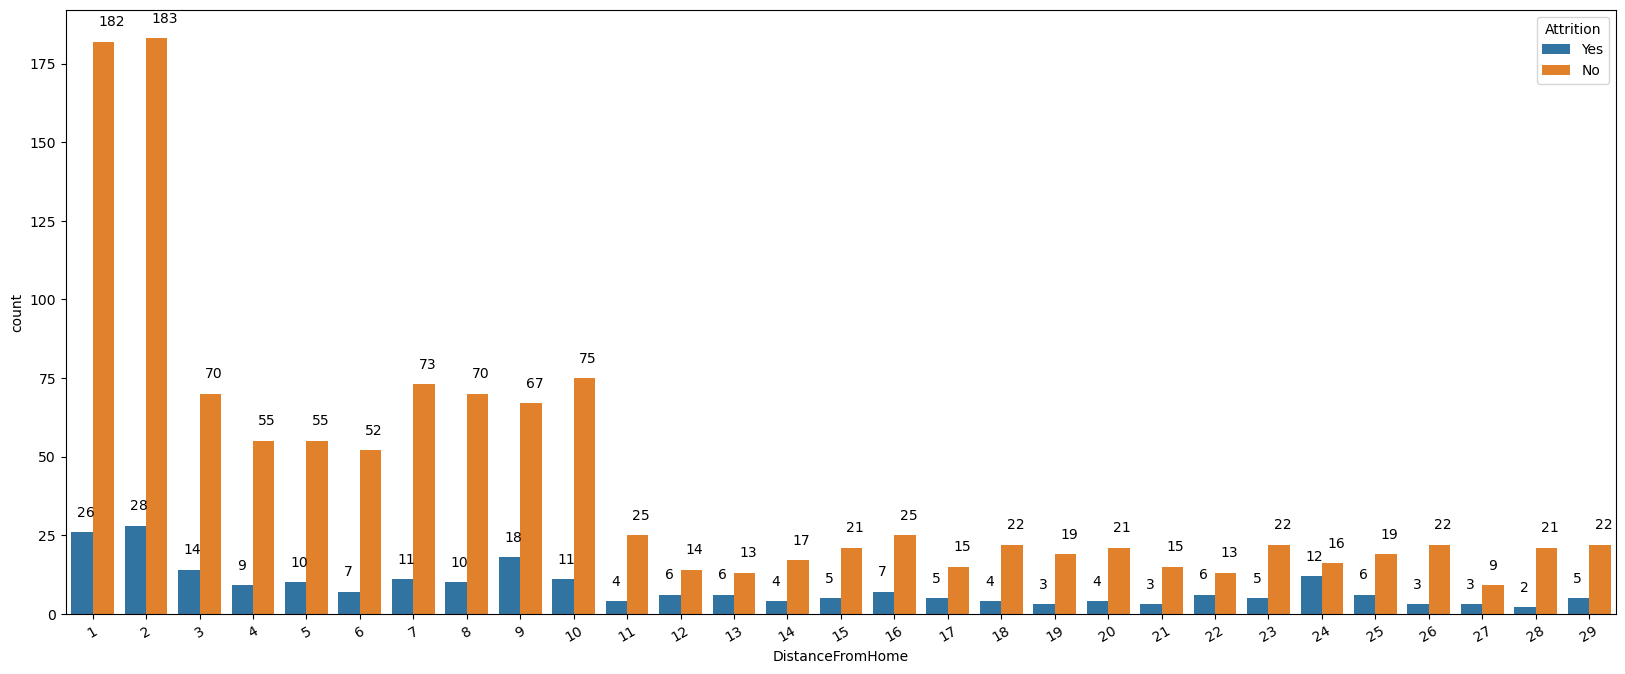

In [31]:
# Countplot for DistanceFromHome
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('DistanceFromHome',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.DistanceFromHome.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. It seems no effect of distance on attrition, as % of getting attrition is ranging between 10-20 % for all.

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


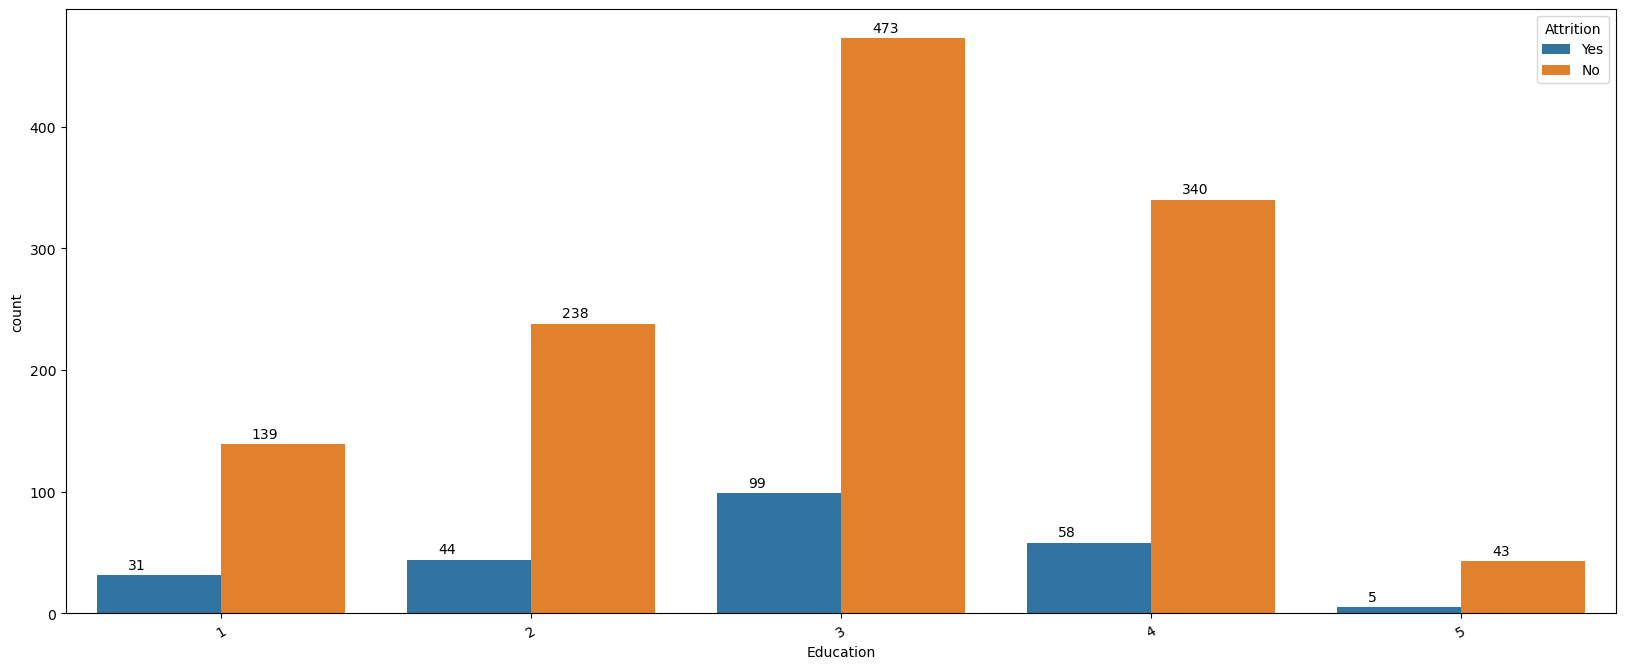

In [32]:
# Countplot for Education
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('Education',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Education.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. It seems no effect of education on attrition, as % of getting attrition is ranging between 10-20 % for all.

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


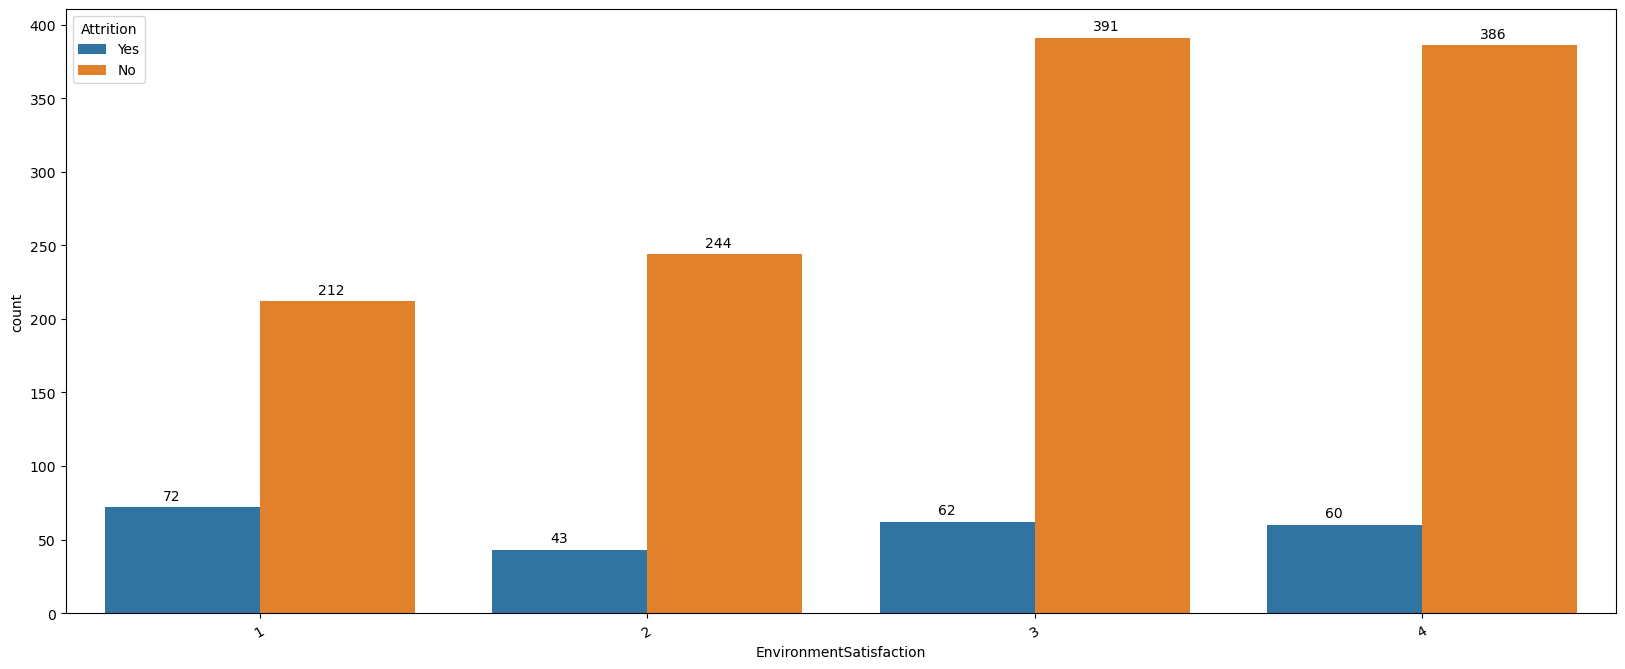

In [33]:
# Countplot for EnvironmentSatisfaction
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('EnvironmentSatisfaction',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.EnvironmentSatisfaction.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))

### Observation - 
1. Employees having 1 EnvironmentSatisfaction are more likely to leave company

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


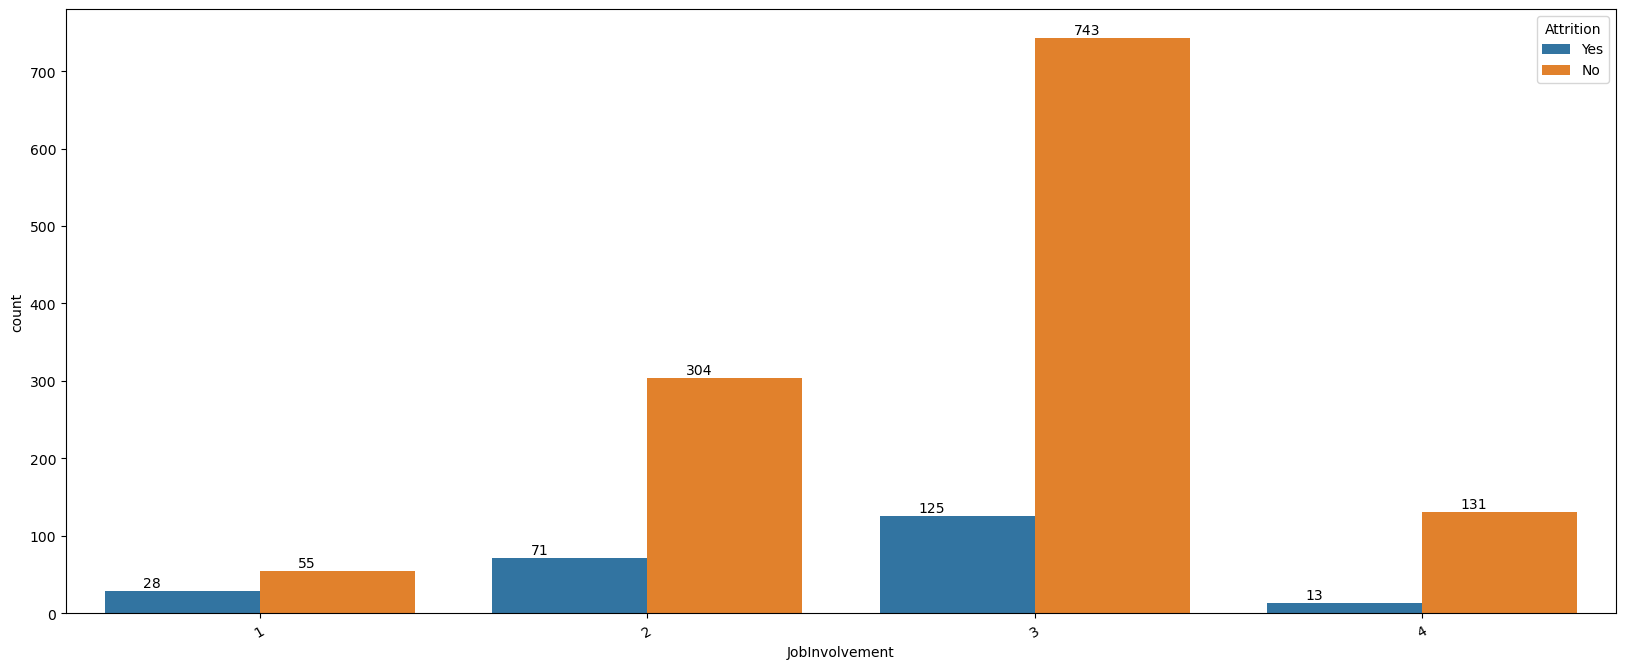

In [34]:
# Countplot for JobInvolvement
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('JobInvolvement',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.JobInvolvement.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. With JobInvolment=1, 33% Chance of leaving company
2. With JobInvolment=2, 18% Chance of leaving company
3. With JobInvolment=3, 15% Chance of leaving company
4. With JobInvolment=4, 8% Chance of leaving company

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


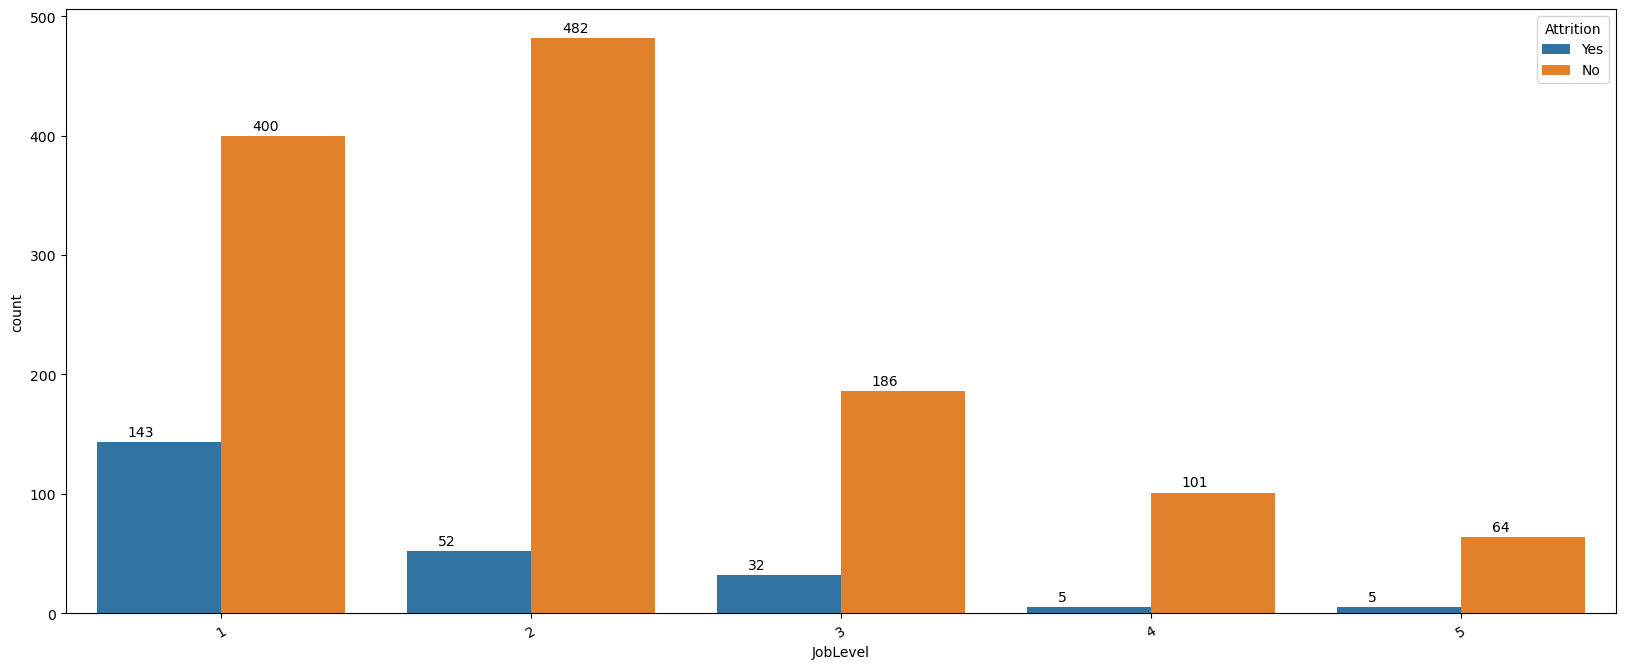

In [35]:
# Countplot for JobLevel
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('JobLevel',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.JobLevel.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation -
For jobLevel = 1, chances employee leaving company are more around 25 %

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


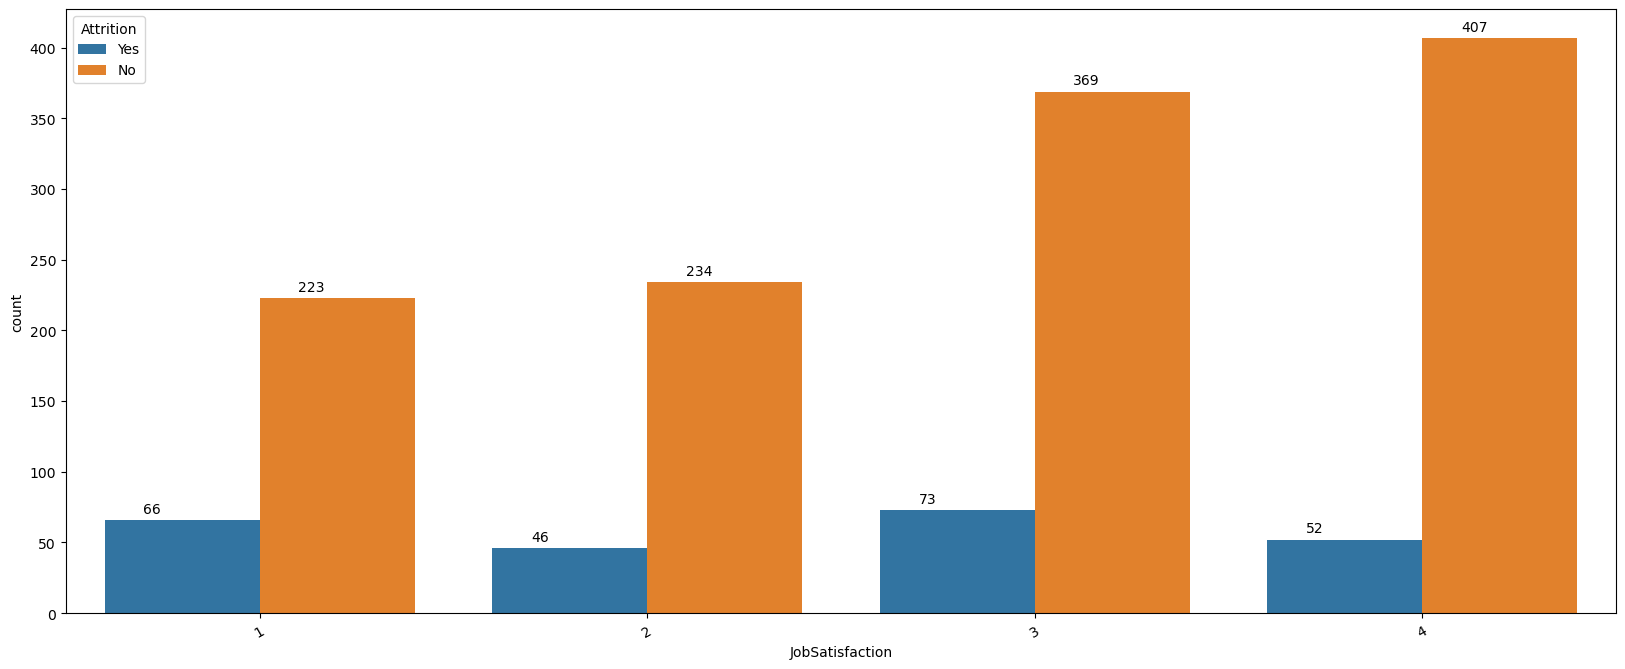

In [36]:
# Countplot for JobSatisfaction
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('JobSatisfaction',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.JobSatisfaction.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Employees with less satisfaction level are more likely to depart in another organisation

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


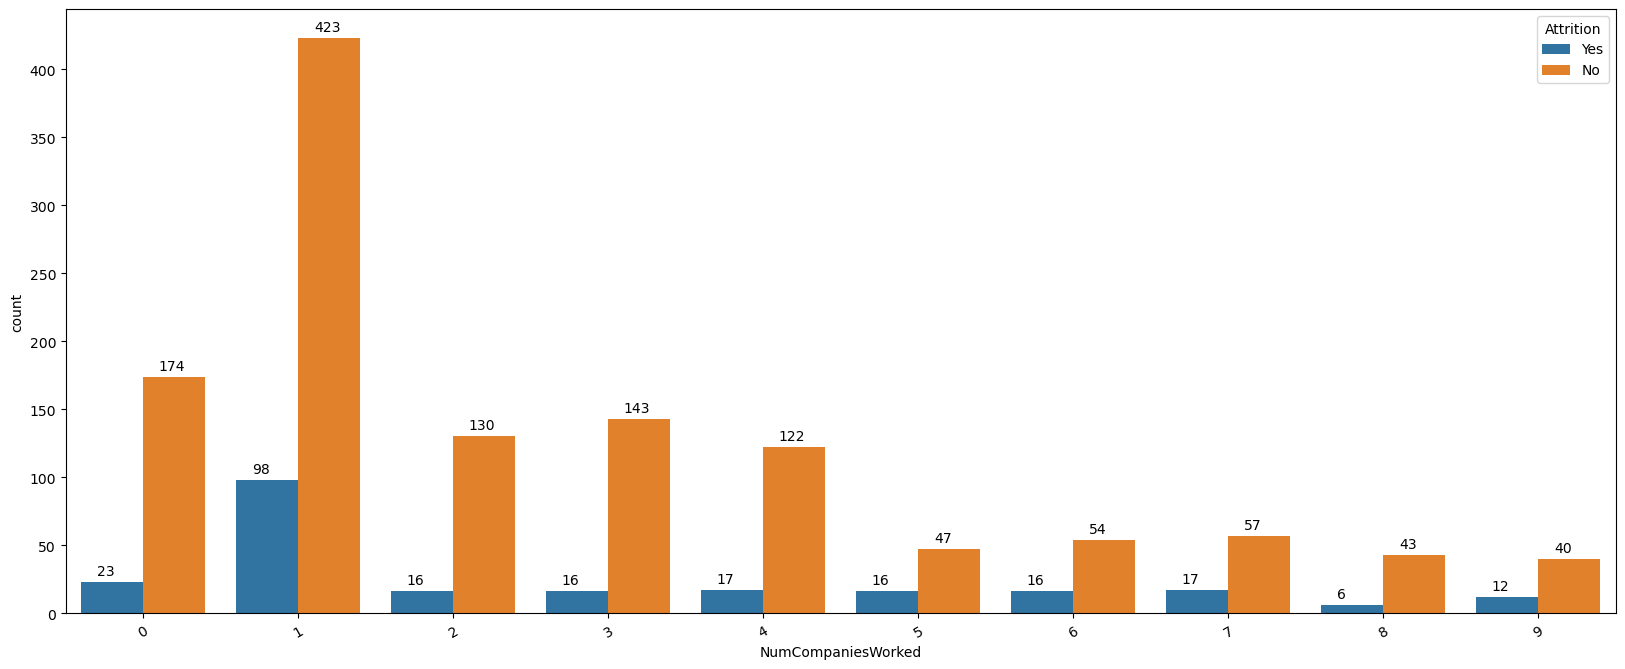

In [37]:
# Countplot for NumCompaniesWorked
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('NumCompaniesWorked',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.NumCompaniesWorked.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. Employees who worked in more companies are more likely to depart
2. Employees with less worked comapnies has low chance of leaving comapny

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


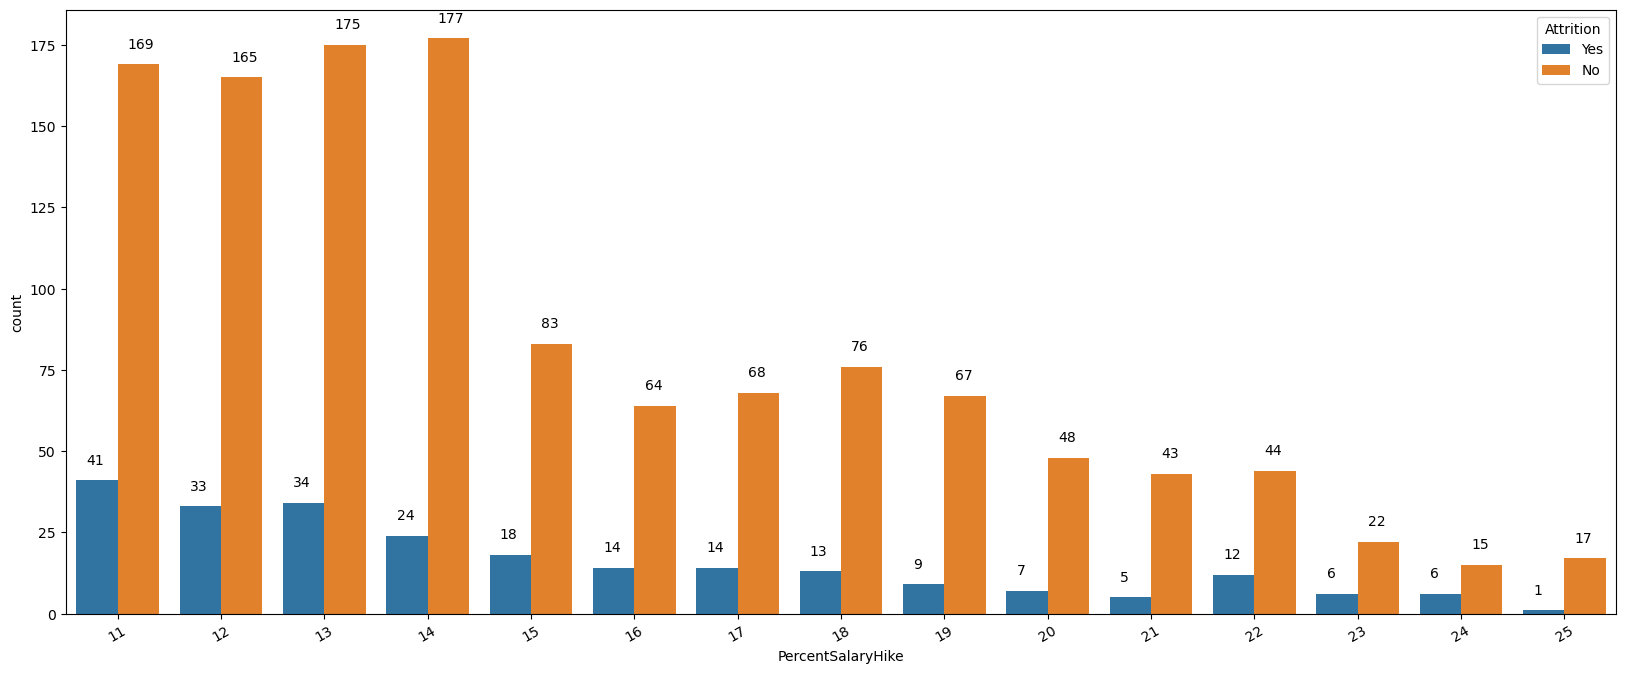

In [38]:
# Countplot for PercentSalaryHike
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('PercentSalaryHike',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.PercentSalaryHike.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observations - 
- It is difficult to establish relationship based only on % hike, because employees with high salary hike also more tends to leave company (Around 25% chance).
- Also employees with % hike 11-15 are more likely to leave company (15% Chance)

3    1244
4     226
Name: PerformanceRating, dtype: int64


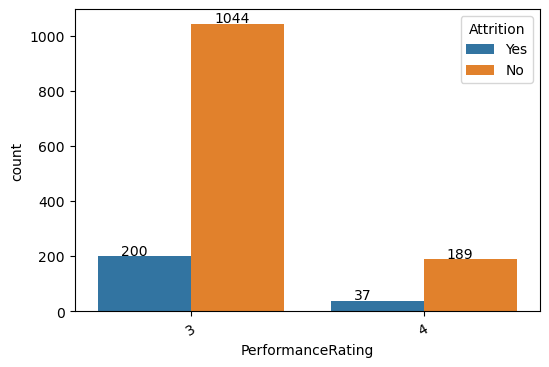

In [39]:
# Countplot for PerformanceRating
plt.figure(dpi=100)
plot = sns.countplot('PerformanceRating',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.PerformanceRating.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Both ratings has almost same departing %

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


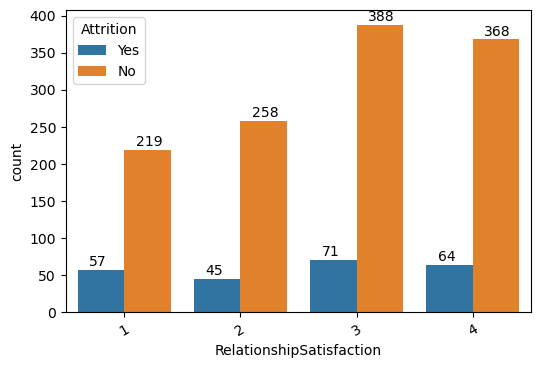

In [40]:
# Countplot for RelationshipSatisfaction
plt.figure(dpi=100)
plot = sns.countplot('RelationshipSatisfaction',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.RelationshipSatisfaction.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Employees with more RelationshipSatisfaction are more likely to stay

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


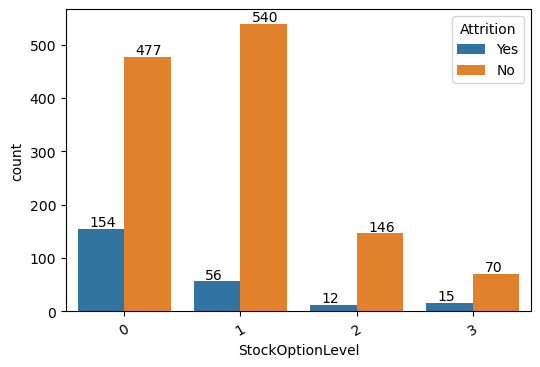

In [41]:
# Countplot for StockOptionLevel
plt.figure(dpi=100)
plot = sns.countplot('StockOptionLevel',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.StockOptionLevel.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Employess with more StockOptionLevel are more likely to stay in organisation

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64


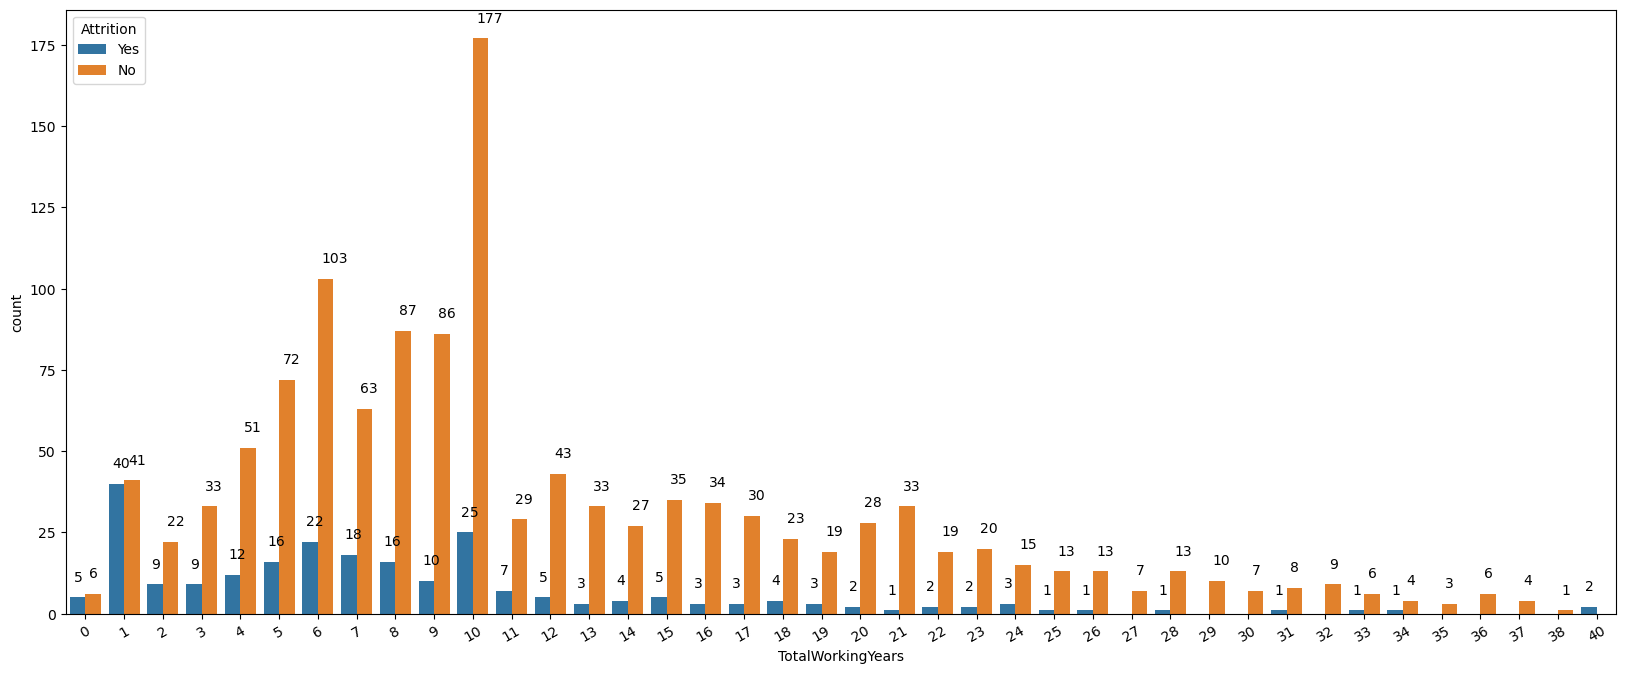

In [42]:
# Countplot for TotalWorkingYears
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('TotalWorkingYears',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.TotalWorkingYears.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
Employees with total working years ranging between 0-10 are more likely to leave company

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


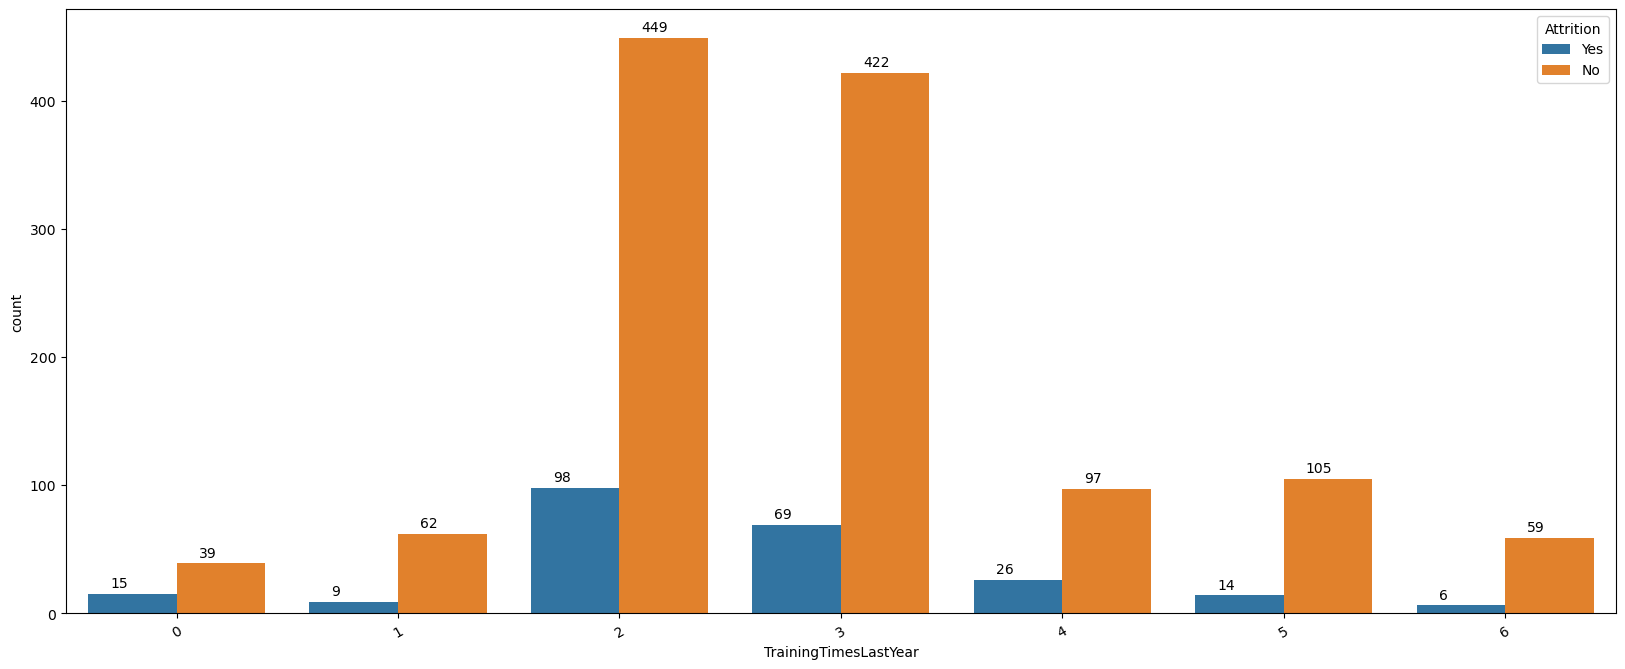

In [43]:
# Countplot for TrainingTimesLastYear
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('TrainingTimesLastYear',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.TrainingTimesLastYear.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


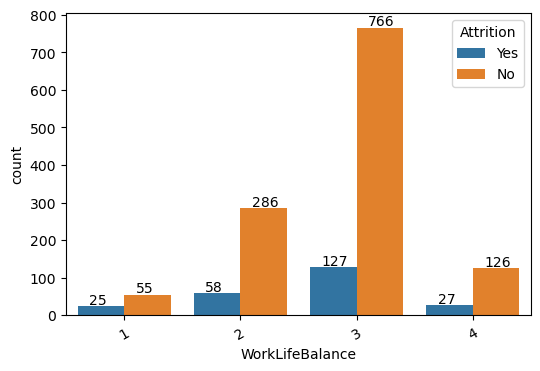

In [44]:
# Countplot for WorkLifeBalance
plt.figure(dpi=100)
plot = sns.countplot('WorkLifeBalance',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.WorkLifeBalance.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64


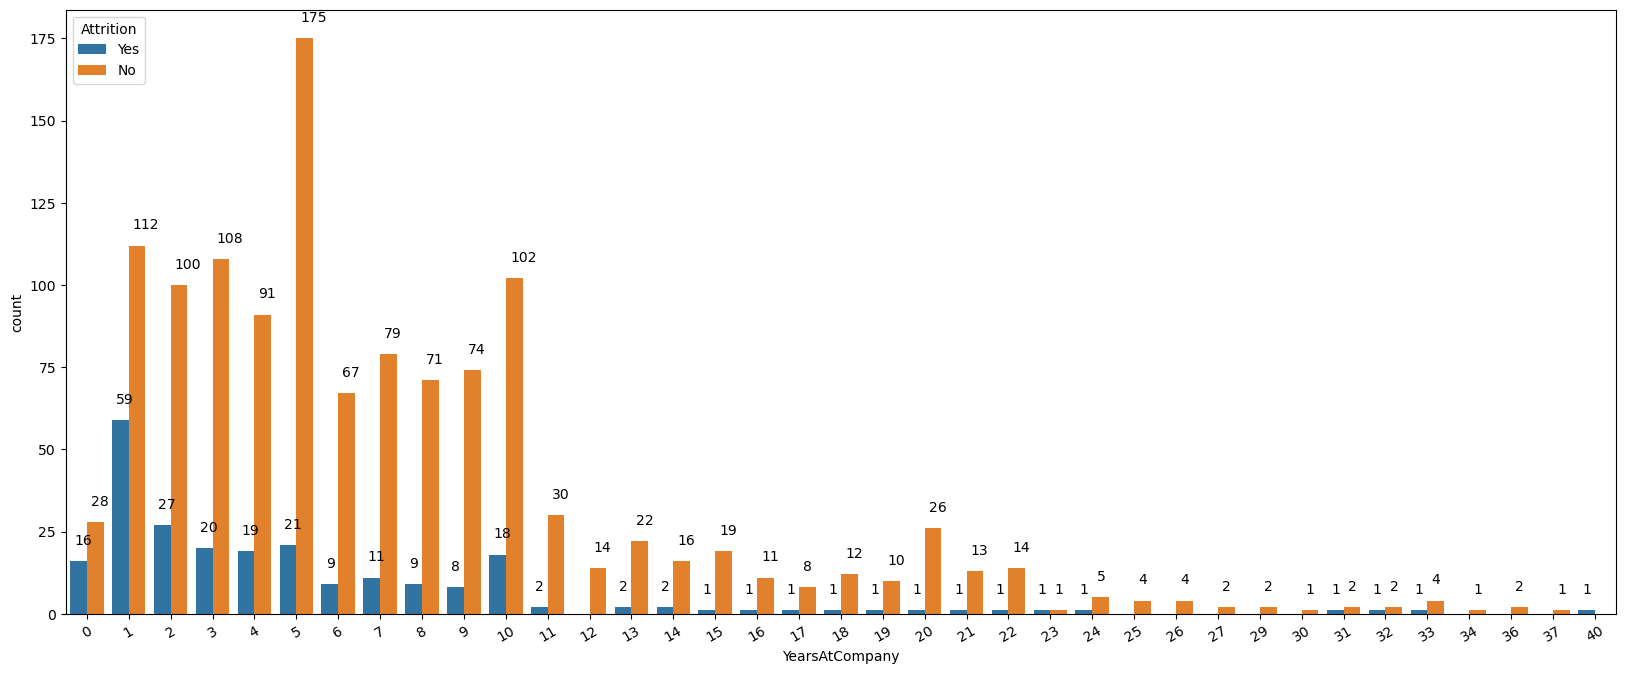

In [45]:
# Countplot for YearsAtCompany
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('YearsAtCompany',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.YearsAtCompany.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


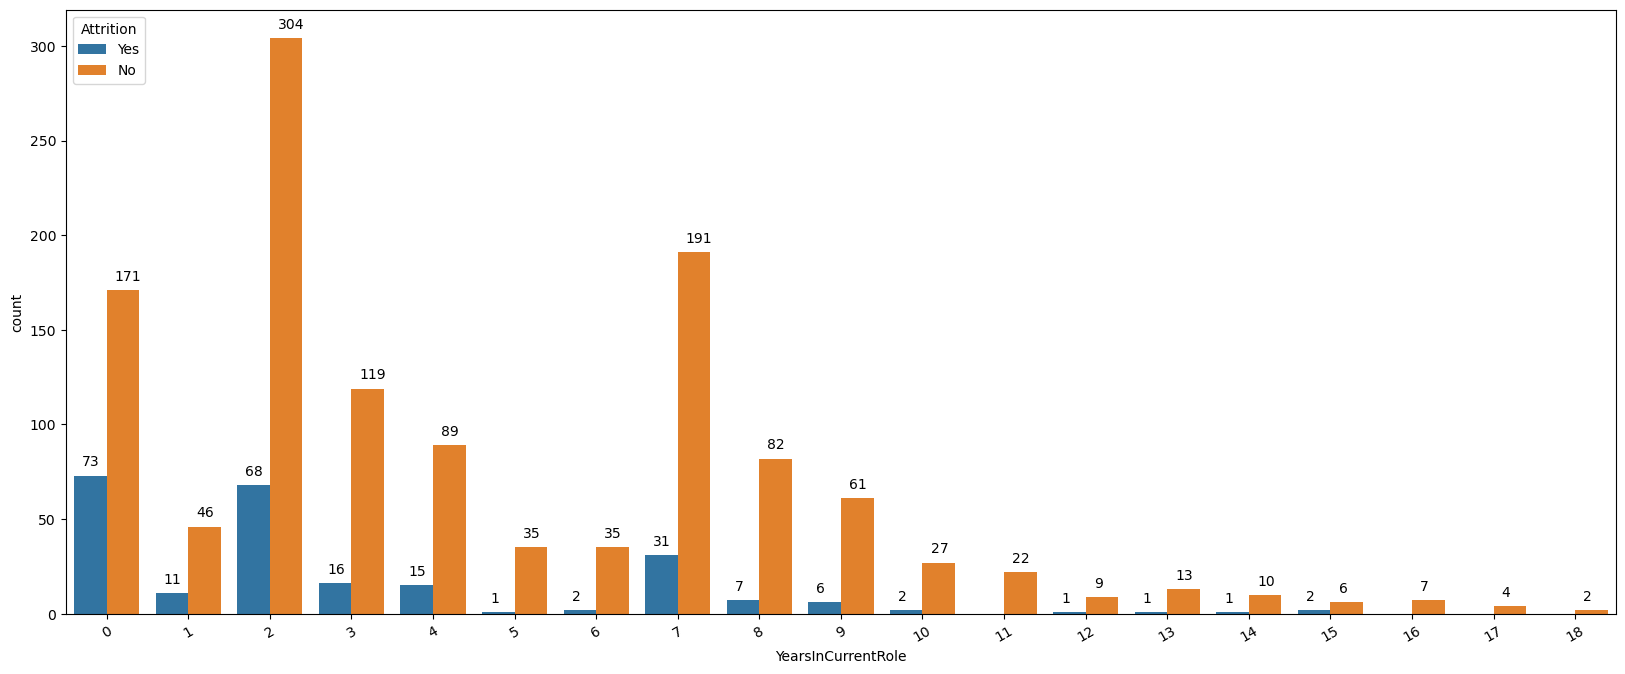

In [46]:
# Countplot for YearsInCurrentRole
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('YearsInCurrentRole',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.YearsInCurrentRole.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


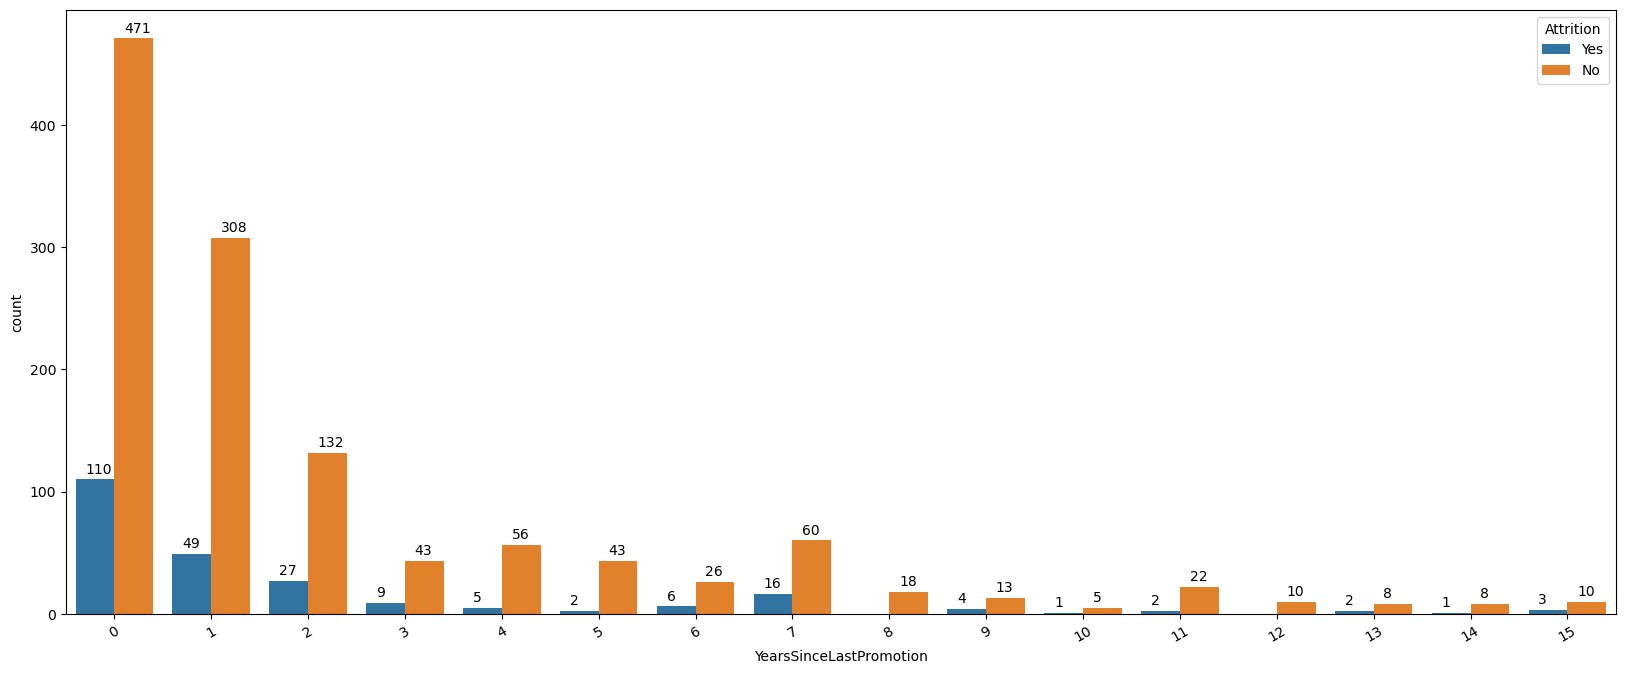

In [47]:
# Countplot for YearsSinceLastPromotion
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('YearsSinceLastPromotion',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.YearsSinceLastPromotion.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64


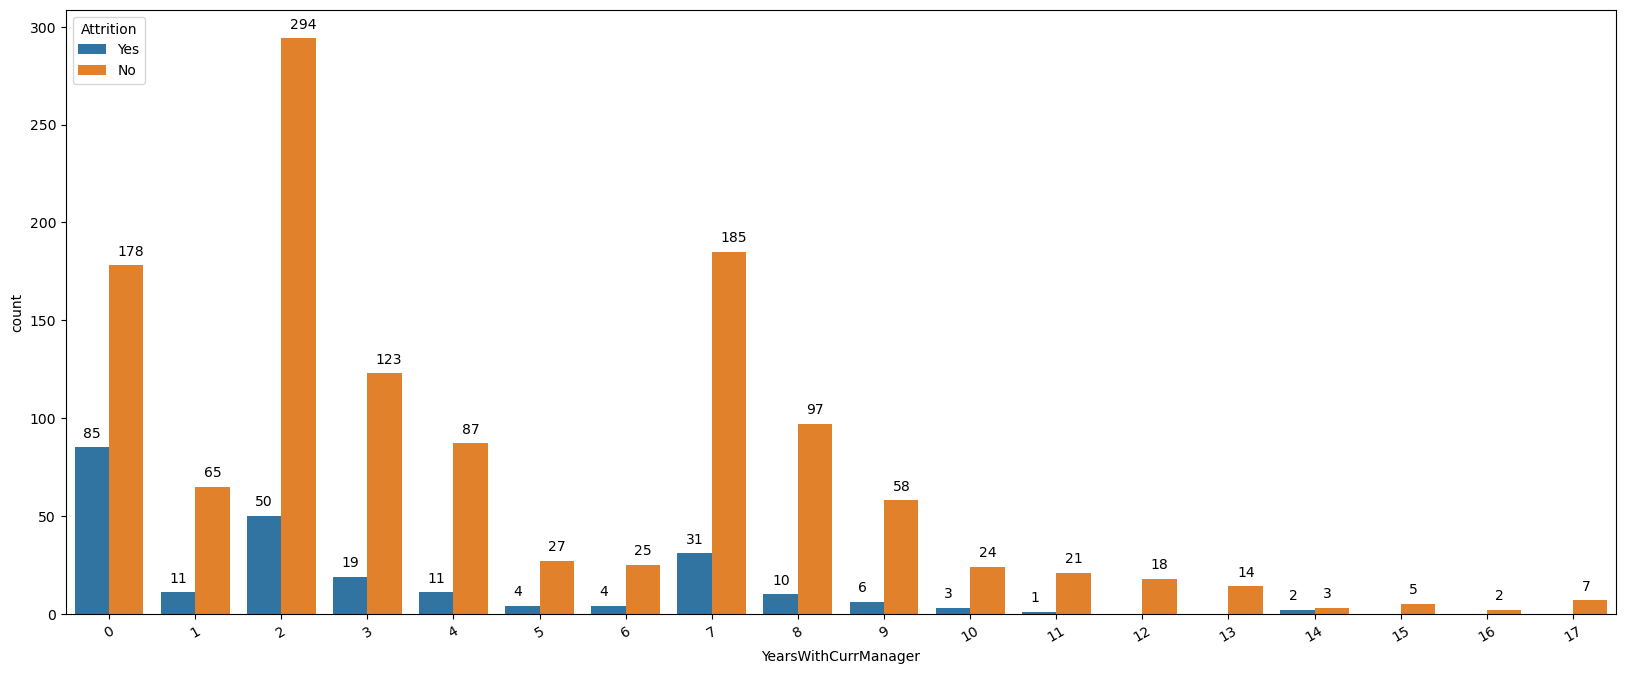

In [48]:
# Countplot for YearsWithCurrManager
plt.figure(dpi=100, figsize=(20,8))
plot = sns.countplot('YearsWithCurrManager',data=df, hue='Attrition')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.YearsWithCurrManager.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
1. TrainingTimesLastYear
    - Employees getting training 2-3 times in year
    - TrainingTimes dosent affect departing status, as it is same for all categories
2. WorkLifeBalance
    - Employees with 1 work life balance are more likely to leave company
3. YearsAtCompany
    - Employees with 0-10 years at company are more likely to leave company.
4. YearsInCurrentRole
    - Employees with more years in current role are less likely to leave company
5. YearsSinceLastPromotion
    - Employees leaving early after 1,2,3 promotion
6. YearsWithCurrManager
    - More employees tend to leaver company after working for 1-2 years

# Checking Unique Values from Data Set

In [49]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

### Observation 
1. 'EmployeeCount', 'Over18' and 'StandardHours' have only one unique values
2. 'EmployeeNumber' has 1470 unique values

Above feature aren't playing important role, so considering dropping them

# ------------------------------------ Handling Outliers ----------------------------------------------

Age                            AxesSubplot(0.125,0.787927;0.168478x0.0920732)
DailyRate                   AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
DistanceFromHome            AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Education                   AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
EmployeeCount                  AxesSubplot(0.125,0.677439;0.168478x0.0920732)
EmployeeNumber              AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
HourlyRate                  AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
JobInvolvement                 AxesSubplot(0.125,0.566951;0.168478x0.0920732)
JobLevel                    AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
JobSatisfaction             AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
MonthlyIncome               AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
MonthlyRate                    AxesSubplot(0.125,0.456463;0.1684

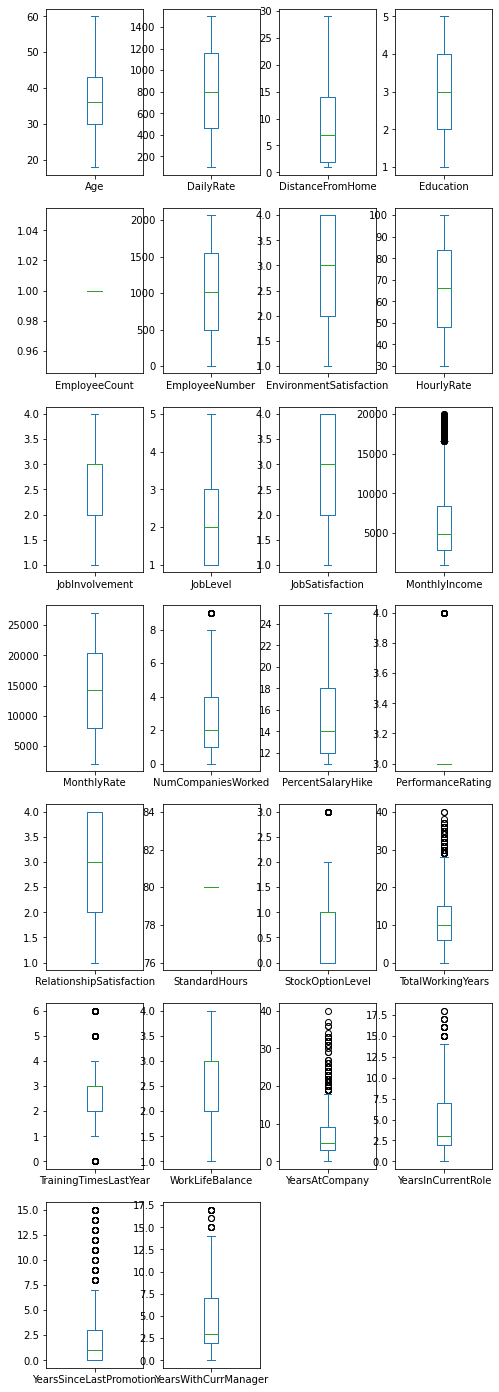

In [50]:
df.plot(kind='box',subplots=True,figsize=(8,25),layout=(7,4))
# plotting individual graph for better understanding of graph

### Observation - 
Outliers present in 
   - MonthlyIncome
   - NumCompaniesWorked
   - PerformanceRating
   - TotalWorkingYears
   - TrainingTimesLastYear
   - YearsAtCompany
   - YearsInCurrentRole
   - YearsSinceLastPromotion
   - YearsWithCurrManager

In [51]:
cols_with_outliers = ['MonthlyIncome','NumCompaniesWorked', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

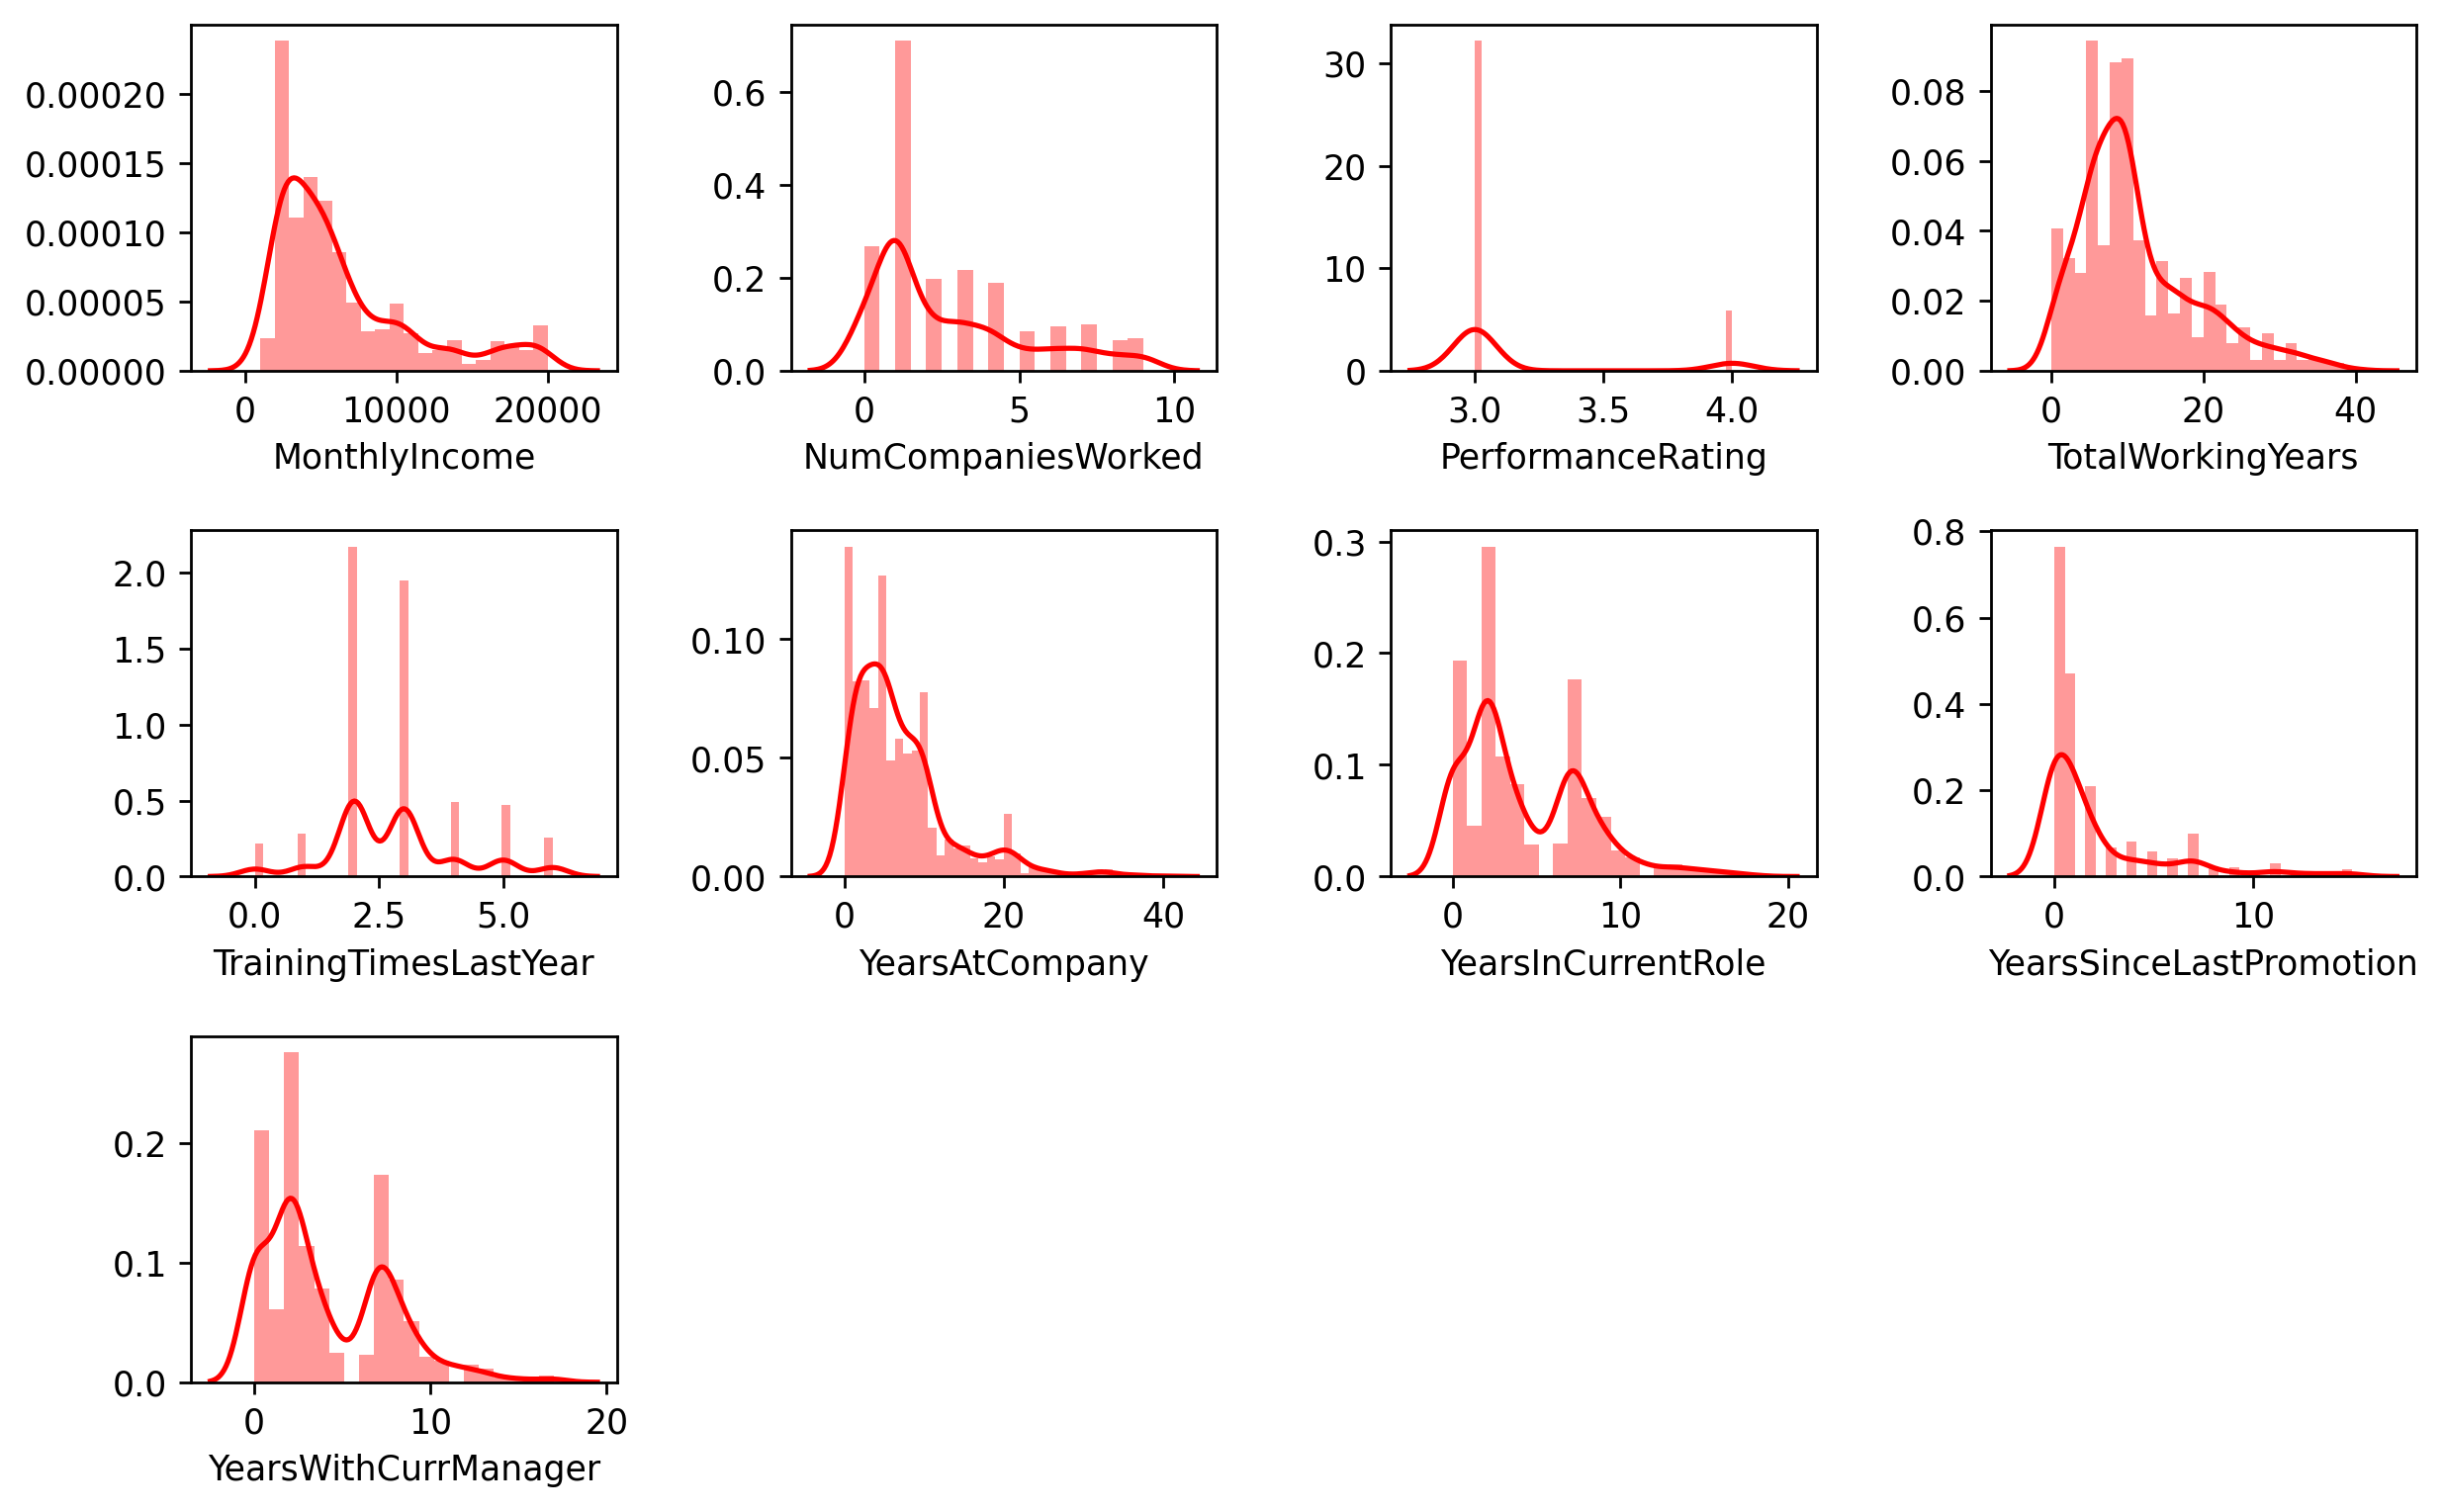

In [129]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

In [53]:
df2 = df.copy()

In [54]:
cols_with_outliers = ['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [55]:
for feature in cols_with_outliers:
    IQR = df2[feature].quantile(0.75) - df2[feature].quantile(0.25)
    upper_bond = df2[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df2[feature].quantile(0.25) - (IQR * 1.5)
    
    df2[feature] = np.where(df2[feature]>upper_bond,upper_bond,df2[feature])
    df2[feature] = np.where(df2[feature]<lower_bond,lower_bond,df2[feature])

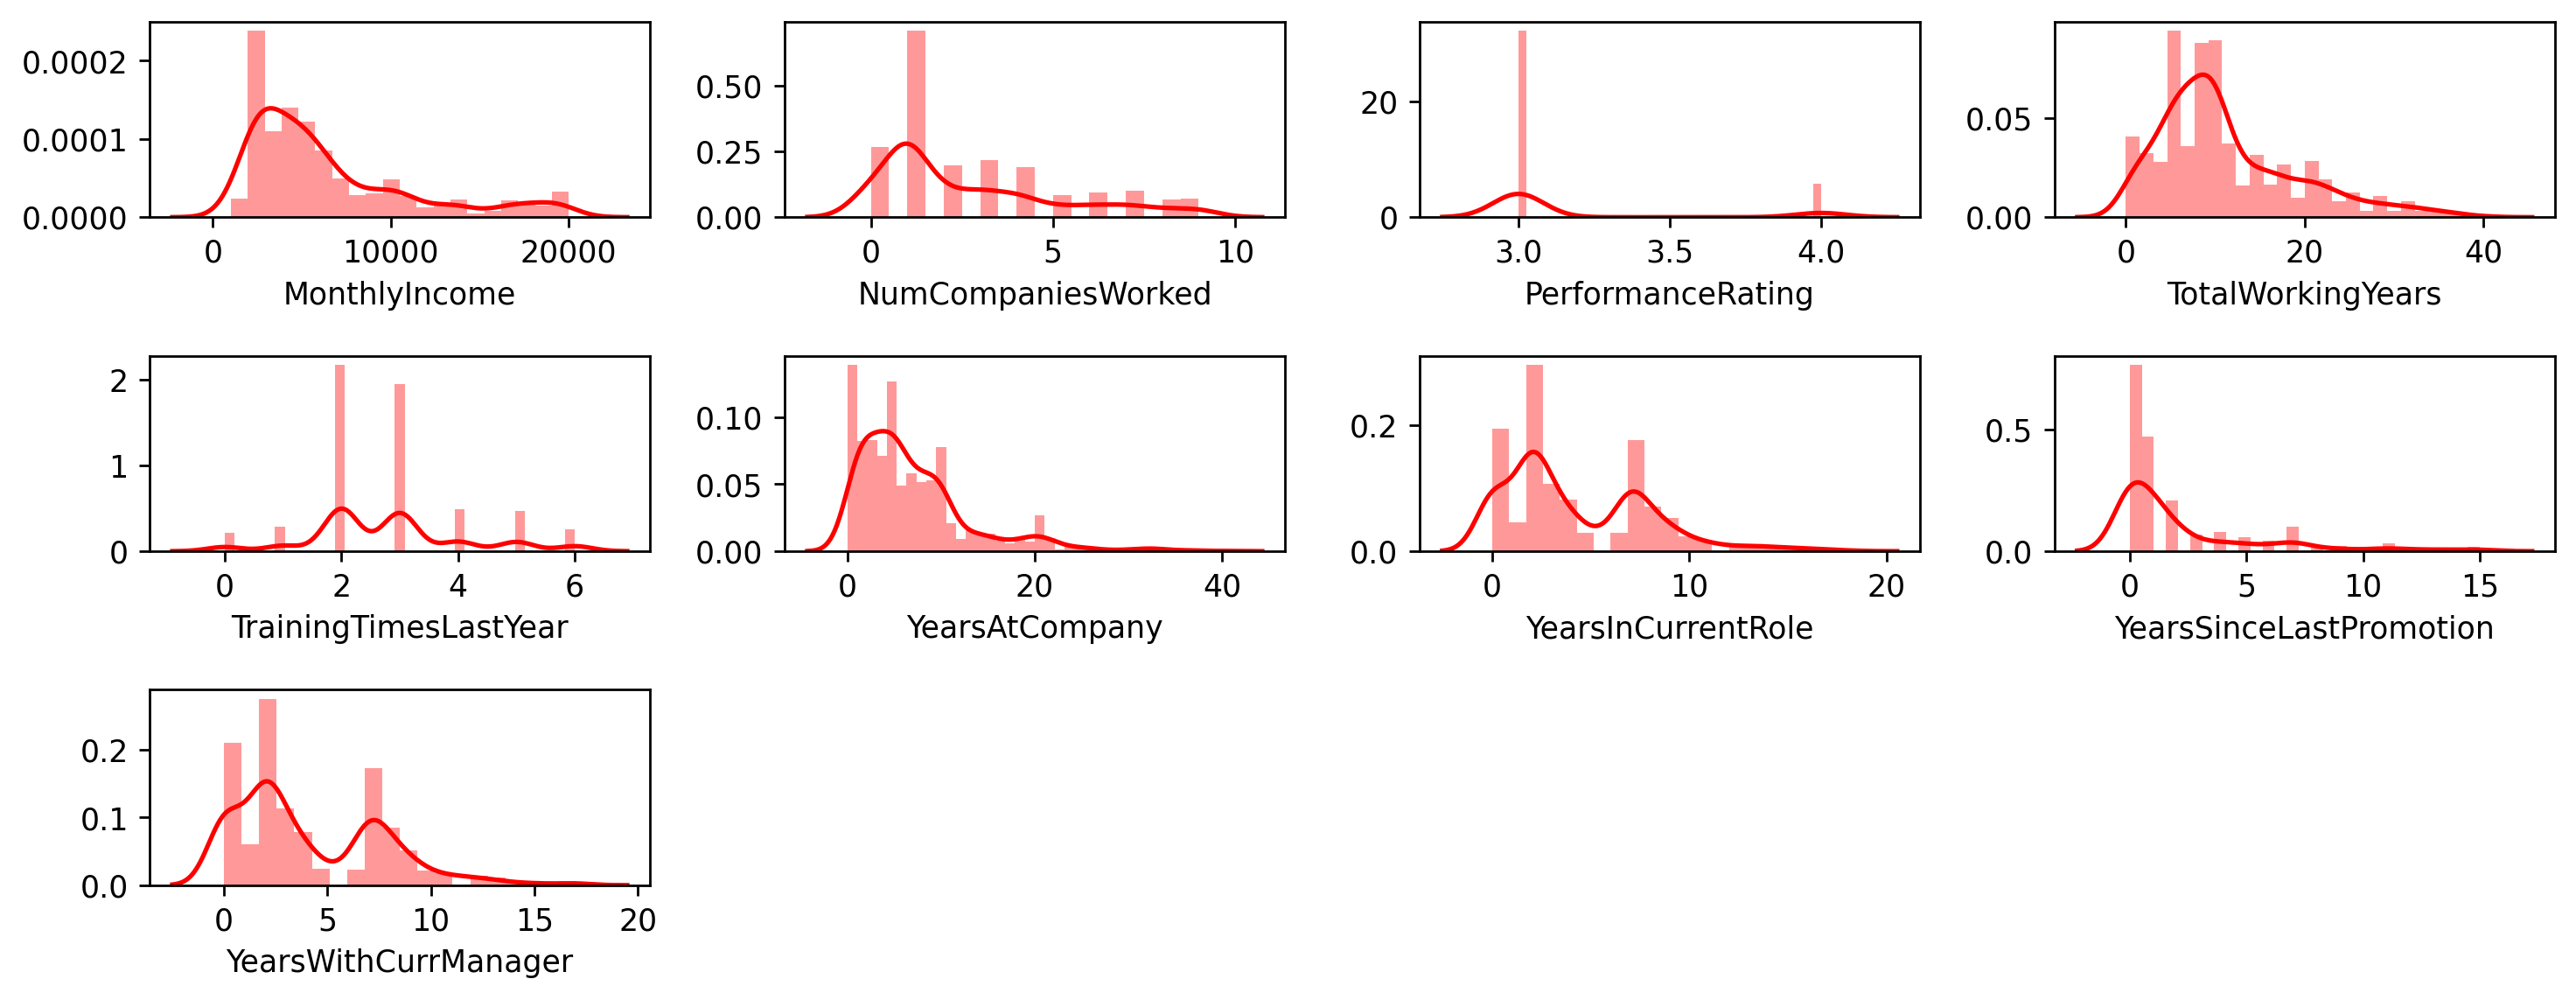

In [130]:
plt.figure(figsize = (12, 12), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(8, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.05)
plt.tight_layout(pad = 1.5)
plt.show()

Age                            AxesSubplot(0.125,0.787927;0.168478x0.0920732)
DailyRate                   AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
DistanceFromHome            AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Education                   AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
EmployeeCount                  AxesSubplot(0.125,0.677439;0.168478x0.0920732)
EmployeeNumber              AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
HourlyRate                  AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
JobInvolvement                 AxesSubplot(0.125,0.566951;0.168478x0.0920732)
JobLevel                    AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
JobSatisfaction             AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
MonthlyIncome               AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
MonthlyRate                    AxesSubplot(0.125,0.456463;0.1684

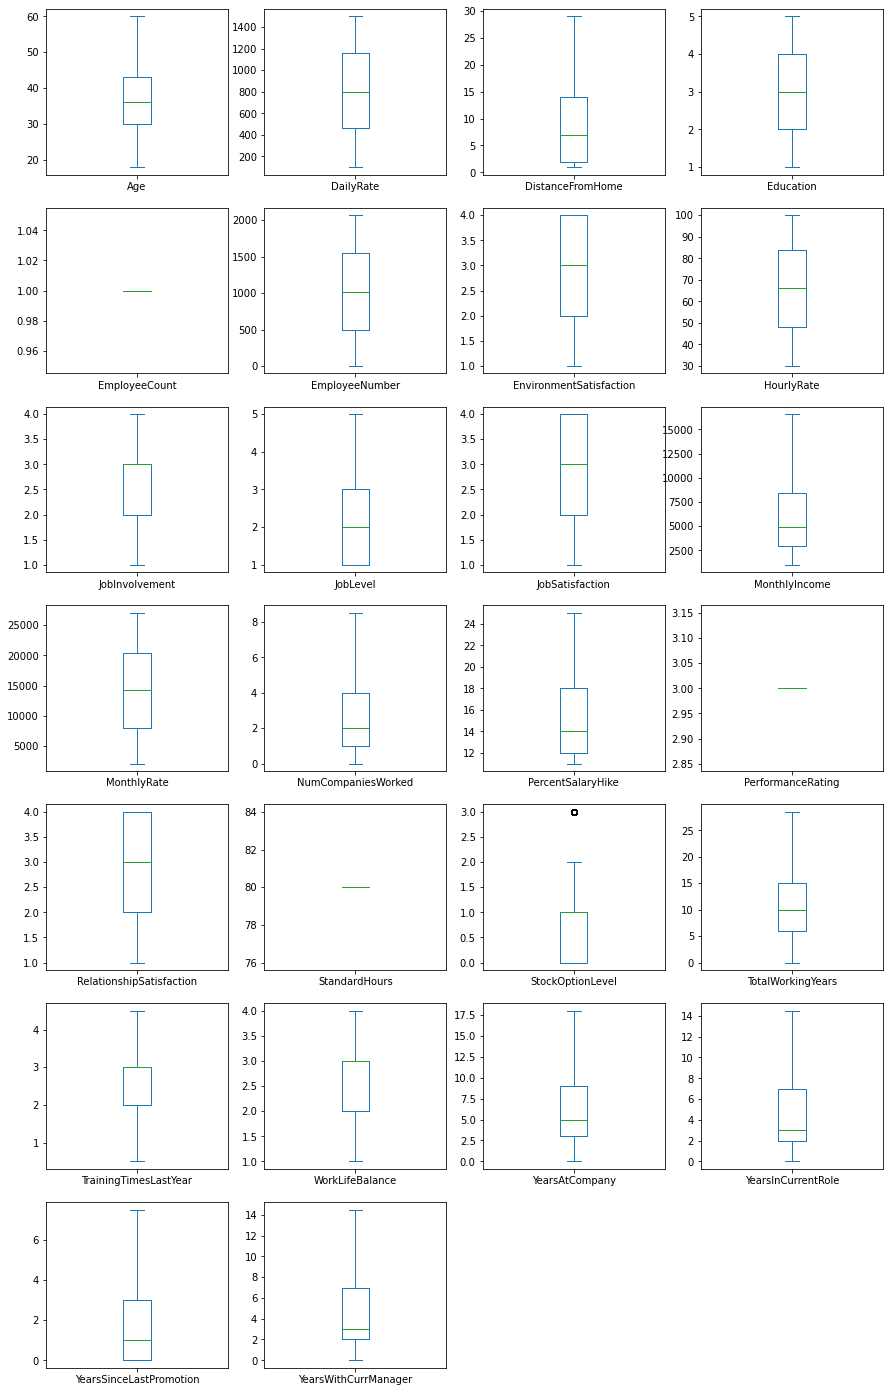

In [57]:
df2.plot(kind='box',subplots=True,figsize=(15,25),layout=(7,4))
# plotting individual graph for better understanding of graph

In [58]:
df2.shape

(1470, 35)

### Observation - 
Based on Previous Observation, We can drop EmployeeCount, StandardHours, EmployeeNumber

In [59]:
df2.drop('EmployeeCount',axis=1,inplace=True)
df2.drop('StandardHours',axis=1,inplace=True)
df2.drop('EmployeeNumber',axis=1,inplace=True)
df2.drop('Over18',axis=1,inplace=True)

In [60]:
df2.shape

(1470, 31)

# Checking correlation

In [61]:
# Changing binary representation of our target variable to 1/0
df2.Attrition = df2.Attrition.map({'Yes':1, 'No':0})

<AxesSubplot:>

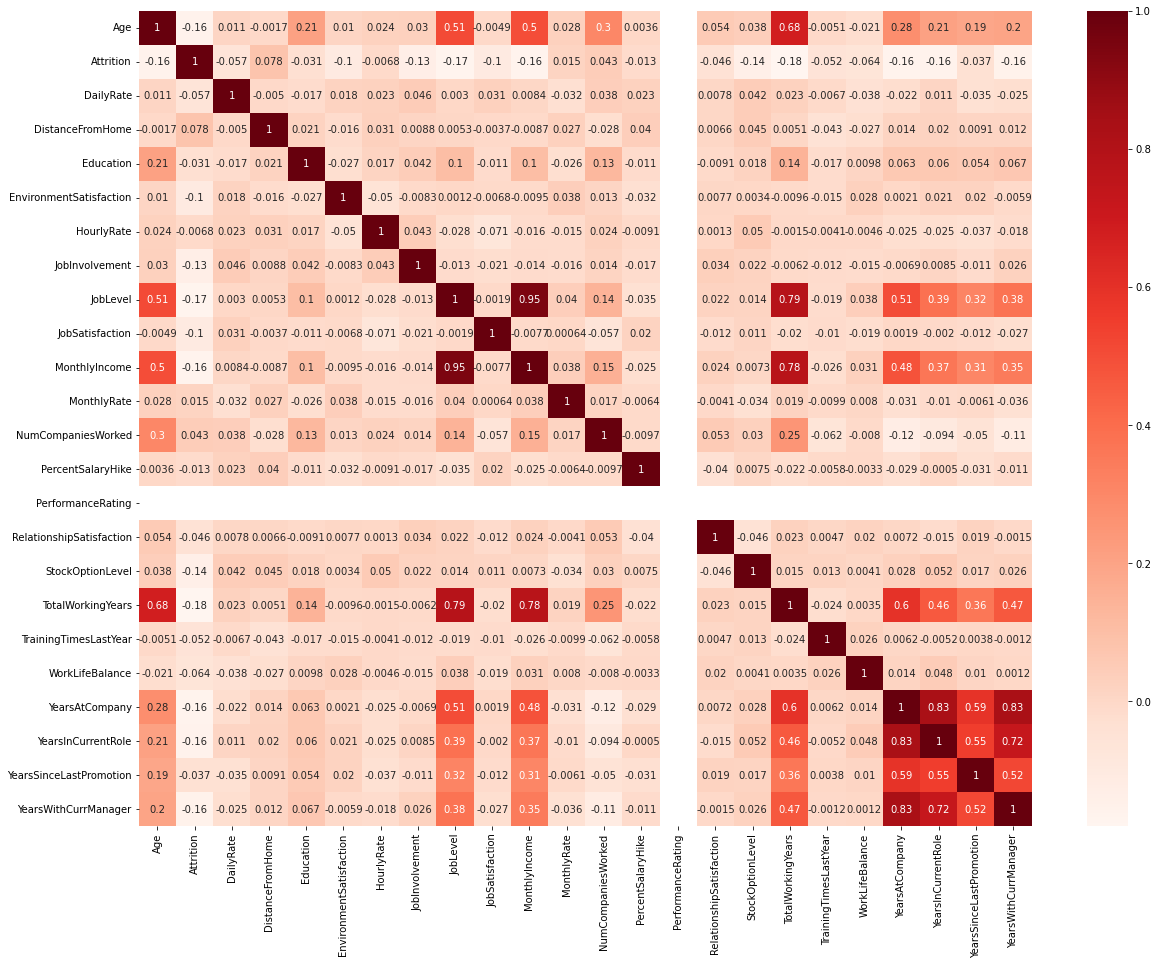

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(),cmap='Reds',annot=True)

### Observation - 
- PercentSalaryHike and PerformanceRating have a fairly strong positive relationship
- TotalWorkingYears has a fairly strong positive relationship with Age, MonthlyIncome, and JobLevel
- YearsAtCompany has a fairly strong positive relationship with YearsInCurrentRole and YearsWithCurrManager

# ----------------------------- Removing Skewness of Data ---------------------------------------

In [63]:
clean_df = df2.copy()

In [64]:
clean_df.head(1)

Age  Attrition BusinessTravel  DailyRate Department  DistanceFromHome  \
0   41          1  Travel_Rarely       1102      Sales                 1   

   Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2  Life Sciences                        2  Female          94   

   JobInvolvement  JobLevel          JobRole  JobSatisfaction MaritalStatus  \
0               3         2  Sales Executive                4        Single   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0         5993.0        19479                 8.0      Yes                 11   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                3.0                         1                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                8.0                    0.5                1             6.0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                 4.0                      0.0                   5.0

In [65]:
label_=LabelEncoder()
#Bad becomes 0,and good becomes 1
clean_df['BusinessTravel']=label_.fit_transform(clean_df['BusinessTravel'])
clean_df['Department']=label_.fit_transform(clean_df['Department'])
clean_df['EducationField']=label_.fit_transform(clean_df['EducationField'])
clean_df['Gender']=label_.fit_transform(clean_df['Gender'])
clean_df['JobRole']=label_.fit_transform(clean_df['JobRole'])
clean_df['MaritalStatus']=label_.fit_transform(clean_df['MaritalStatus'])
clean_df['OverTime']=label_.fit_transform(clean_df['OverTime'])
clean_df['Attrition']=label_.fit_transform(clean_df['Attrition'])

In [66]:
clean_df.head(1)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0         5993.0        19479                 8.0         1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                3.0                         1   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                8.0                    0.5   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1             6.0                 4.0   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                      0.0                   5.0

In [67]:
y = clean_df['Attrition']
x = clean_df.drop('Attrition', axis=1)

In [68]:
x.skew().sort_values()

BusinessTravel             -1.439006
WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
Gender                     -0.408665
JobRole                    -0.357270
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
MaritalStatus              -0.152175
HourlyRate                 -0.032311
DailyRate                  -0.003519
PerformanceRating           0.000000
MonthlyRate                 0.018578
TrainingTimesLastYear       0.117931
Department                  0.172231
Age                         0.413286
EducationField              0.550371
YearsWithCurrManager        0.741000
YearsInCurrentRole          0.803704
PercentSalaryHike           0.821128
TotalWorkingYears           0.855518
YearsAtCompany              0.900774
DistanceFromHome            0.958118
OverTime                    0.964489
StockOptionLevel            0.968980
NumCompaniesWorked          0.971516
J

In [69]:
#removal of skew-ness using log function
for col in x.columns:
    if x.skew().loc[col]>0.3:
        x[col]=np.log1p(x[col])

In [70]:
x.skew().sort_values()

BusinessTravel             -1.439006
TotalWorkingYears          -0.693979
WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
Gender                     -0.408665
YearsAtCompany             -0.398163
YearsInCurrentRole         -0.397943
YearsWithCurrManager       -0.368007
JobRole                    -0.357270
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
MaritalStatus              -0.152175
Age                        -0.136232
EducationField             -0.054786
HourlyRate                 -0.032311
DistanceFromHome           -0.029121
DailyRate                  -0.003519
PerformanceRating           0.000000
MonthlyRate                 0.018578
NumCompaniesWorked          0.076286
TrainingTimesLastYear       0.117931
Department                  0.172231
MonthlyIncome               0.211023
StockOptionLevel            0.271963
JobLevel                    0.448133
P

<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

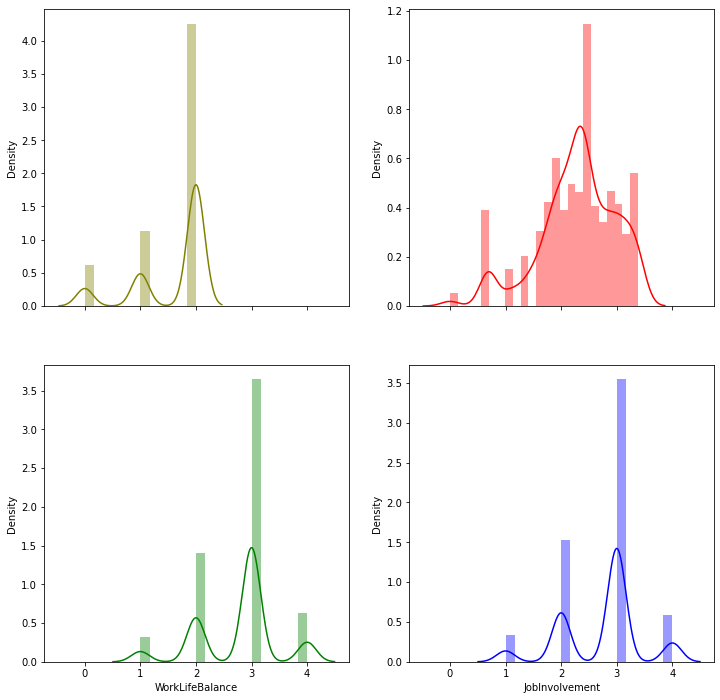

In [71]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)

sns.distplot( x['BusinessTravel'] , color="olive", ax=axes[0, 0])
sns.distplot( x['TotalWorkingYears'] , color="red", ax=axes[0, 1])
sns.distplot( x['WorkLifeBalance'] , color="green", ax=axes[1, 0])
sns.distplot( x['JobInvolvement'] , color="blue", ax=axes[1, 1])

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

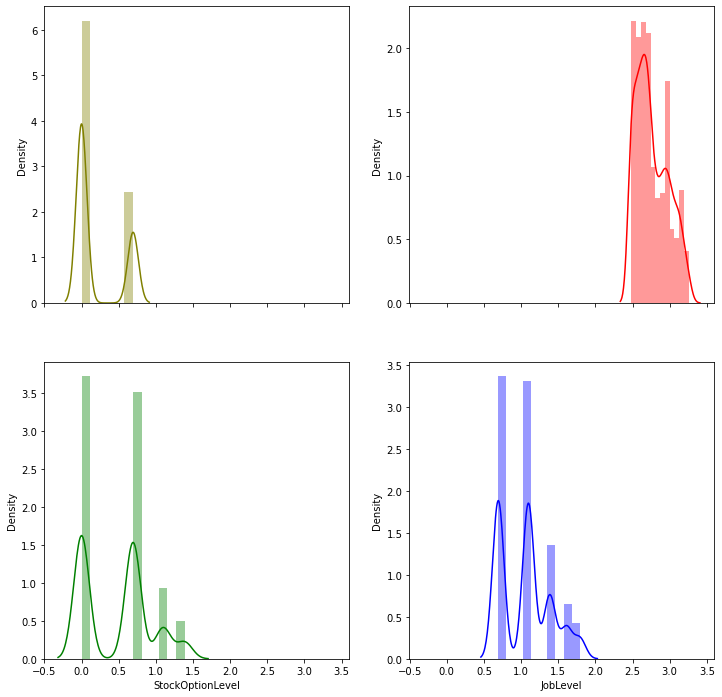

In [72]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)

sns.distplot( x['OverTime'] , color="olive", ax=axes[0, 0])
sns.distplot( x['PercentSalaryHike'] , color="red", ax=axes[0, 1])
sns.distplot( x['StockOptionLevel'] , color="green", ax=axes[1, 0])
sns.distplot( x['JobLevel'] , color="blue", ax=axes[1, 1])

# ------------------------------ Feature Engineering ----------------------------------------

<AxesSubplot:>

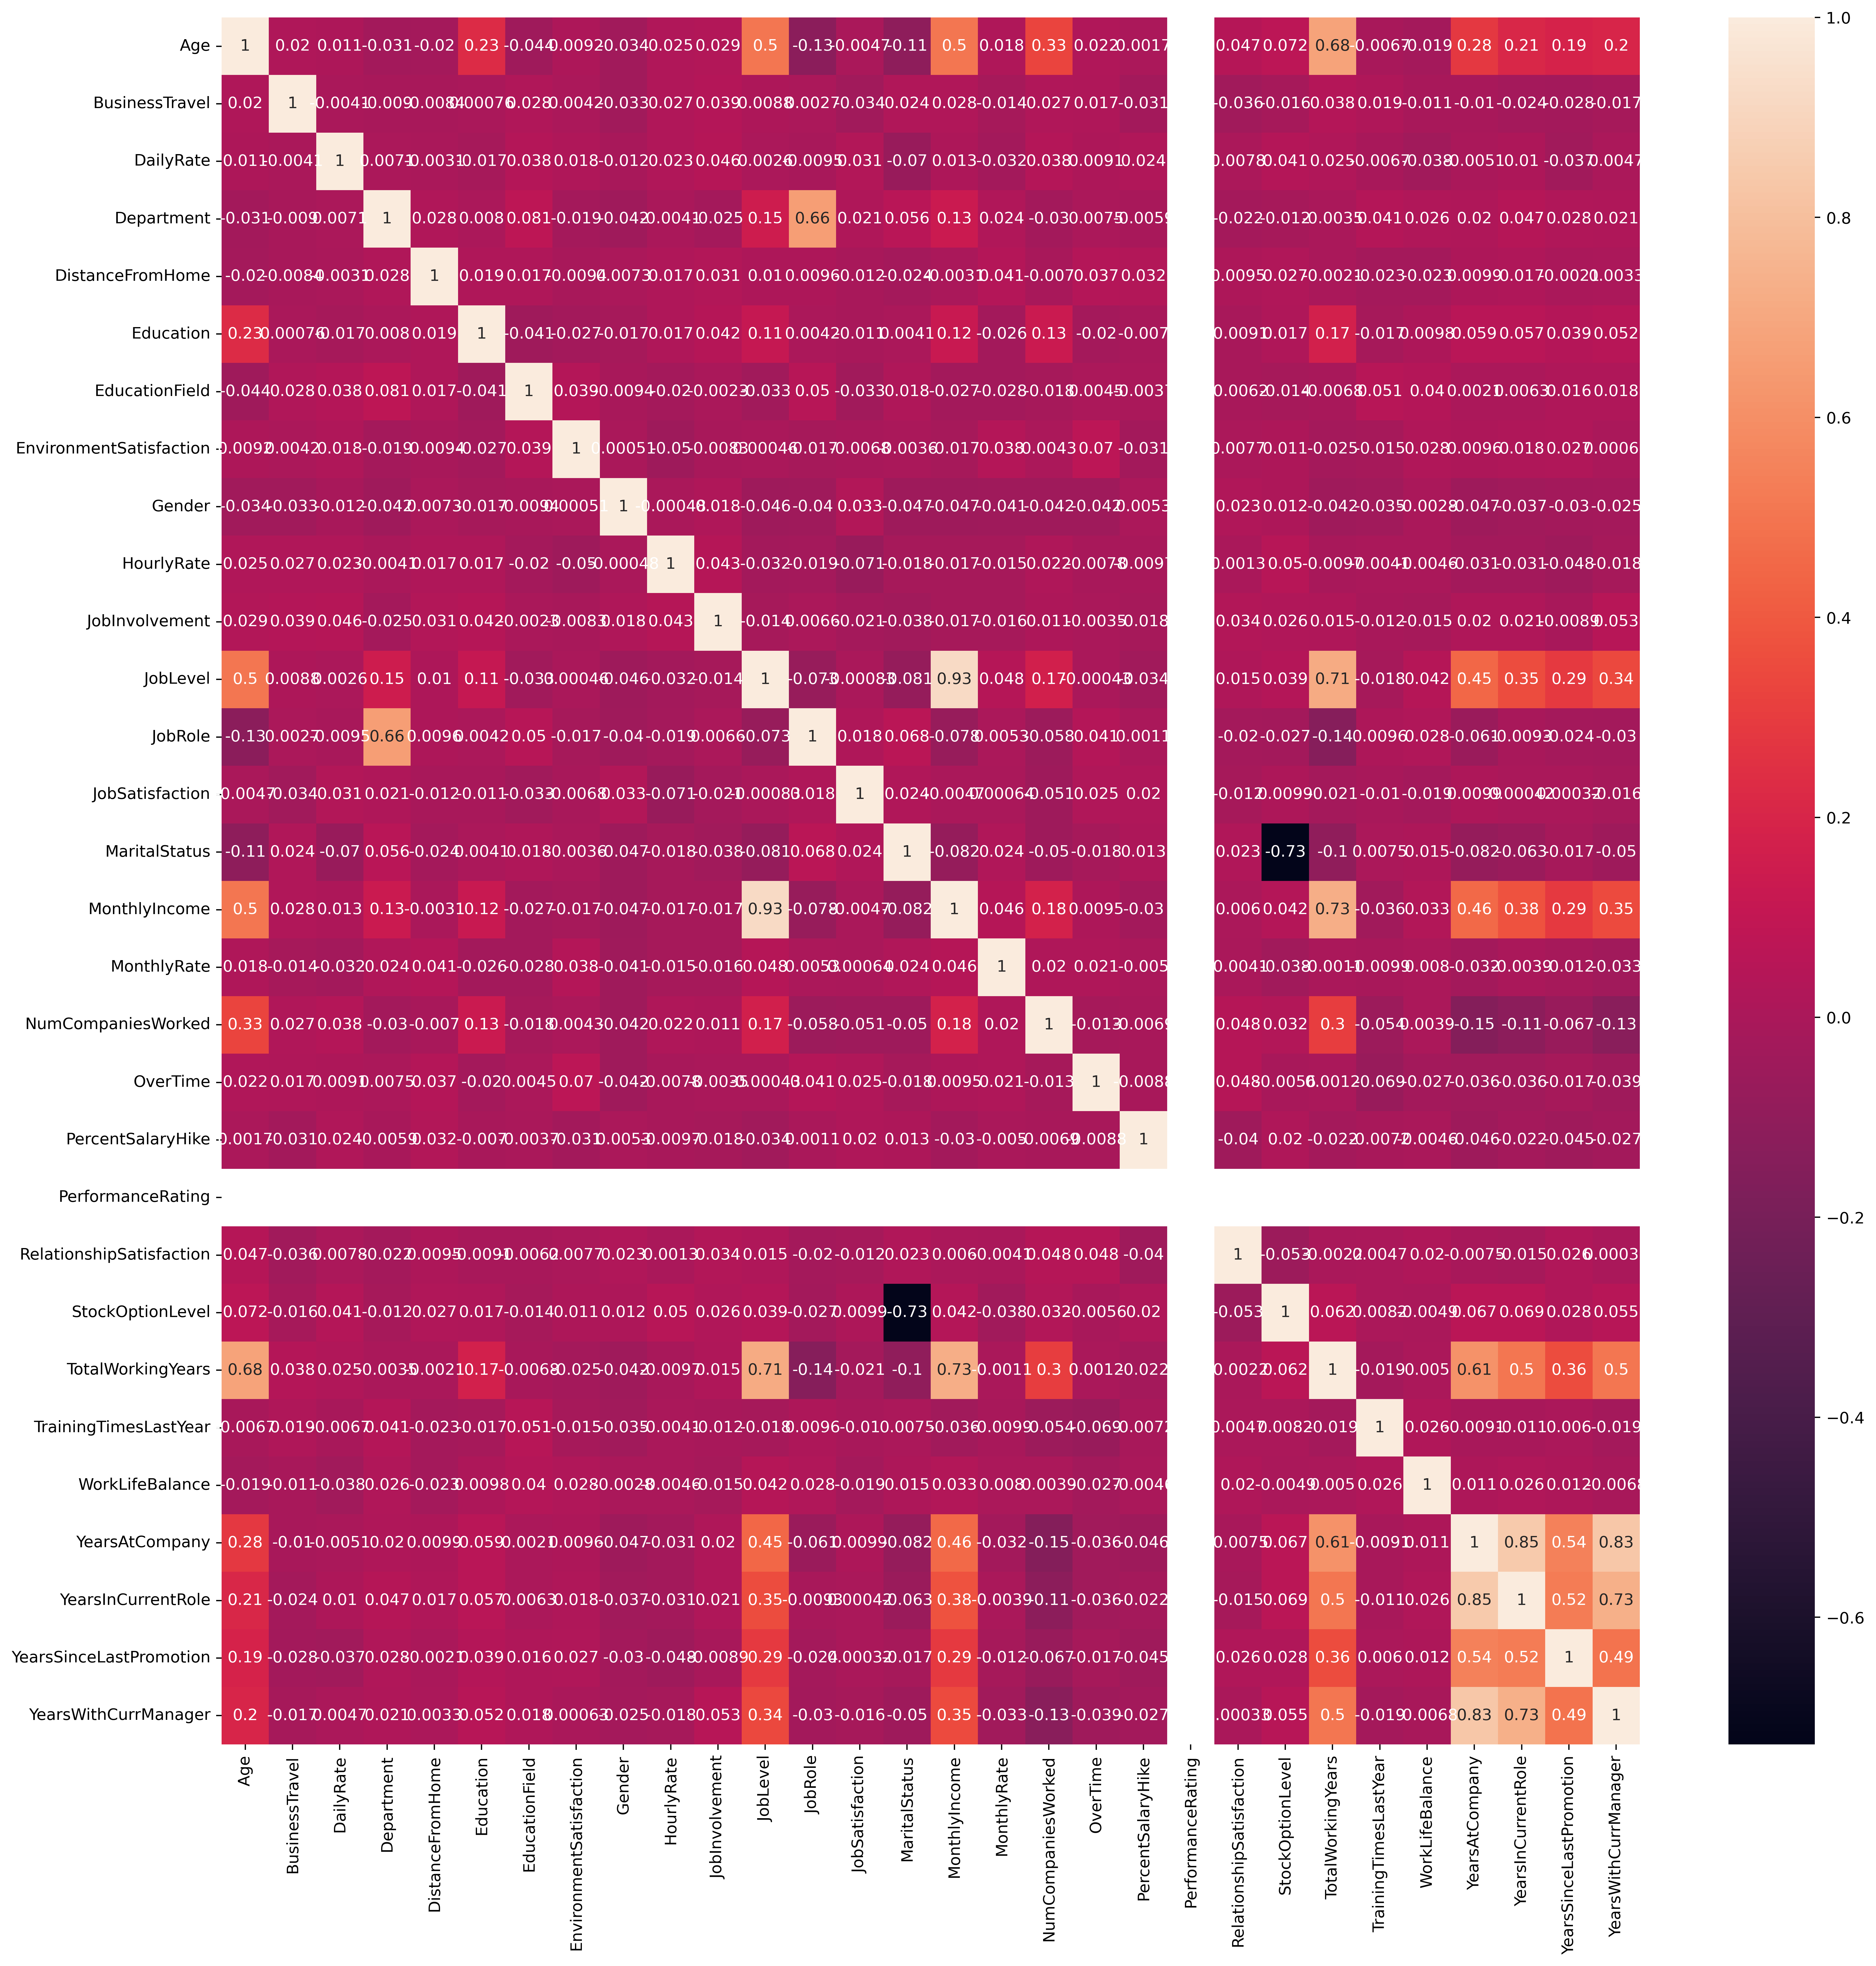

In [73]:
plt.figure(figsize=(20,20), dpi=400)
sns.heatmap(x.corr(), annot=True)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [76]:
calc_vif(x)

variables   VIF FACTOR
0                        Age     2.059763
1             BusinessTravel     1.017395
2                  DailyRate     1.020949
3                 Department     1.965291
4           DistanceFromHome     1.013029
5                  Education     1.072445
6             EducationField     1.025747
7    EnvironmentSatisfaction     1.022896
8                     Gender     1.021522
9                 HourlyRate     1.021879
10            JobInvolvement     1.020480
11                  JobLevel     7.457504
12                   JobRole     1.907771
13           JobSatisfaction     1.020585
14             MaritalStatus     2.199446
15             MonthlyIncome     7.624497
16               MonthlyRate     1.019814
17        NumCompaniesWorked     1.427696
18                  OverTime     1.028671
19         PercentSalaryHike     1.014368
20         PerformanceRating  1414.050790
21  RelationshipSatisfaction     1.022332
22          StockOptionLevel     2.166263
23         TotalWorkingYears     4.553334
24     TrainingTimesLastYear     1.021624
25           WorkLifeBalance     1.014383
26            YearsAtCompany     6.876398
27        YearsInCurrentRole     3.729452
28   YearsSinceLastPromotion     1.482430
29      YearsWithCurrManager     3.416419

### Observation - 
It is observed that, PerformanceRating	is having high VIF Factor = 1414.050790
So dropping this column.

In [77]:
x.drop('PerformanceRating', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0                        Age  350.509171
1             BusinessTravel    6.946374
2                  DailyRate    5.054951
3                 Department   13.183195
4           DistanceFromHome    6.394548
5                  Education    9.748316
6             EducationField    8.031176
7    EnvironmentSatisfaction    7.314186
8                     Gender    2.545343
9                 HourlyRate   11.730697
10            JobInvolvement   15.880243
11                  JobLevel   49.529484
12                   JobRole    8.149045
13           JobSatisfaction    7.246726
14             MaritalStatus    7.095127
15             MonthlyIncome  567.278972
16               MonthlyRate    5.138571
17        NumCompaniesWorked    5.206207
18                  OverTime    1.434457
19         PercentSalaryHike  150.485615
20  RelationshipSatisfaction    7.436287
21          StockOptionLevel    4.562558
22         TotalWorkingYears   48.363086
23     TrainingTimesLastYear    7.911151
24           WorkLifeBalance   16.286692
25            YearsAtCompany   48.457397
26        YearsInCurrentRole   14.949723
27   YearsSinceLastPromotion    2.978488
28      YearsWithCurrManager   13.021671

### Observation -
It is observed that, Age is having high VIF Factor = 350.509171 So dropping this column.

In [78]:
x.drop('Age', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0             BusinessTravel    6.945965
1                  DailyRate    5.054912
2                 Department   13.177021
3           DistanceFromHome    6.393826
4                  Education    9.520593
5             EducationField    8.031176
6    EnvironmentSatisfaction    7.245439
7                     Gender    2.544534
8                 HourlyRate   11.661970
9             JobInvolvement   15.759664
10                  JobLevel   43.015231
11                   JobRole    8.146244
12           JobSatisfaction    7.221212
13             MaritalStatus    7.094134
14             MonthlyIncome  376.093310
15               MonthlyRate    5.128092
16        NumCompaniesWorked    5.165021
17                  OverTime    1.434098
18         PercentSalaryHike  142.612961
19  RelationshipSatisfaction    7.359140
20          StockOptionLevel    4.554624
21         TotalWorkingYears   41.728607
22     TrainingTimesLastYear    7.863386
23           WorkLifeBalance   16.276262
24            YearsAtCompany   48.447631
25        YearsInCurrentRole   14.836890
26   YearsSinceLastPromotion    2.974357
27      YearsWithCurrManager   12.968320

### Observation -
It is observed that, MonthlyIncome is having high VIF Factor = 376.093310 So dropping this column.

In [79]:
x.drop('MonthlyIncome', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0             BusinessTravel    6.786690
1                  DailyRate    5.015730
2                 Department   13.149331
3           DistanceFromHome    6.371717
4                  Education    9.378815
5             EducationField    7.916095
6    EnvironmentSatisfaction    7.149972
7                     Gender    2.524088
8                 HourlyRate   11.275555
9             JobInvolvement   15.299184
10                  JobLevel   24.655744
11                   JobRole    8.133113
12           JobSatisfaction    7.113169
13             MaritalStatus    6.954084
14               MonthlyRate    5.053706
15        NumCompaniesWorked    5.141032
16                  OverTime    1.430468
17         PercentSalaryHike   72.752349
18  RelationshipSatisfaction    7.229229
19          StockOptionLevel    4.494363
20         TotalWorkingYears   41.200566
21     TrainingTimesLastYear    7.773855
22           WorkLifeBalance   15.777218
23            YearsAtCompany   47.845270
24        YearsInCurrentRole   14.822152
25   YearsSinceLastPromotion    2.974300
26      YearsWithCurrManager   12.918764

### Observation -
It is observed that, PercentSalaryHike is having high VIF Factor = 72.752349 So dropping this column.

In [80]:
x.drop('PercentSalaryHike', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0             BusinessTravel    6.680333
1                  DailyRate    4.913520
2                 Department   13.135889
3           DistanceFromHome    6.209481
4                  Education    9.192808
5             EducationField    7.732521
6    EnvironmentSatisfaction    7.001326
7                     Gender    2.483947
8                 HourlyRate   10.777018
9             JobInvolvement   14.533106
10                  JobLevel   24.608081
11                   JobRole    8.092320
12           JobSatisfaction    6.840856
13             MaritalStatus    6.496858
14               MonthlyRate    4.949264
15        NumCompaniesWorked    5.125616
16                  OverTime    1.428694
17  RelationshipSatisfaction    7.094179
18          StockOptionLevel    4.270240
19         TotalWorkingYears   41.036439
20     TrainingTimesLastYear    7.544033
21           WorkLifeBalance   14.820585
22            YearsAtCompany   47.518006
23        YearsInCurrentRole   14.791314
24   YearsSinceLastPromotion    2.968921
25      YearsWithCurrManager   12.902043

### Observation -
It is observed that, YearsAtCompany is having high VIF Factor = 47.518006 So dropping this column.

In [81]:
x.drop('YearsAtCompany', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0             BusinessTravel    6.670333
1                  DailyRate    4.913280
2                 Department   13.135889
3           DistanceFromHome    6.200955
4                  Education    9.192595
5             EducationField    7.731133
6    EnvironmentSatisfaction    6.980632
7                     Gender    2.482344
8                 HourlyRate   10.757982
9             JobInvolvement   14.524617
10                  JobLevel   24.517028
11                   JobRole    8.090500
12           JobSatisfaction    6.794190
13             MaritalStatus    6.496186
14               MonthlyRate    4.947890
15        NumCompaniesWorked    4.783567
16                  OverTime    1.428362
17  RelationshipSatisfaction    7.080113
18          StockOptionLevel    4.269834
19         TotalWorkingYears   37.070008
20     TrainingTimesLastYear    7.534308
21           WorkLifeBalance   14.777290
22        YearsInCurrentRole   10.047362
23   YearsSinceLastPromotion    2.940474
24      YearsWithCurrManager    9.344555

### Observation -
It is observed that, TotalWorkingYears is having high VIF Factor = 37.070008 So dropping this column.

In [82]:
x.drop('TotalWorkingYears', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0             BusinessTravel    6.627218
1                  DailyRate    4.906755
2                 Department   13.061660
3           DistanceFromHome    6.200869
4                  Education    9.048172
5             EducationField    7.705396
6    EnvironmentSatisfaction    6.973534
7                     Gender    2.480756
8                 HourlyRate   10.733040
9             JobInvolvement   14.507965
10                  JobLevel   14.425022
11                   JobRole    8.077170
12           JobSatisfaction    6.789076
13             MaritalStatus    6.495459
14               MonthlyRate    4.947333
15        NumCompaniesWorked    4.026220
16                  OverTime    1.424530
17  RelationshipSatisfaction    7.078381
18          StockOptionLevel    4.269799
19     TrainingTimesLastYear    7.512525
20           WorkLifeBalance   14.777019
21        YearsInCurrentRole    9.648835
22   YearsSinceLastPromotion    2.937739
23      YearsWithCurrManager    8.799874

### Observation -
It is observed that, WorkLifeBalance is having high VIF Factor = 14.777019 So dropping this column.

In [83]:
x.drop('WorkLifeBalance', axis=1, inplace=True)
calc_vif(x)

variables  VIF FACTOR
0             BusinessTravel    6.606099
1                  DailyRate    4.905215
2                 Department   13.061173
3           DistanceFromHome    6.191968
4                  Education    8.992814
5             EducationField    7.599842
6    EnvironmentSatisfaction    6.896542
7                     Gender    2.472649
8                 HourlyRate   10.616522
9             JobInvolvement   14.365840
10                  JobLevel   14.229166
11                   JobRole    8.051893
12           JobSatisfaction    6.757278
13             MaritalStatus    6.399330
14               MonthlyRate    4.923556
15        NumCompaniesWorked    4.022430
16                  OverTime    1.424366
17  RelationshipSatisfaction    7.011179
18          StockOptionLevel    4.227233
19     TrainingTimesLastYear    7.425991
20        YearsInCurrentRole    9.628131
21   YearsSinceLastPromotion    2.937480
22      YearsWithCurrManager    8.792666

# Checking Skewness of Data

In [84]:
x.skew()

BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField             -0.054786
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyRate                 0.018578
NumCompaniesWorked          0.076286
OverTime                    0.964489
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TrainingTimesLastYear       0.117931
YearsInCurrentRole         -0.397943
YearsSinceLastPromotion     0.544636
YearsWithCurrManager       -0.368007
dtype: float64

# Checking Correlation of Data

<AxesSubplot:>

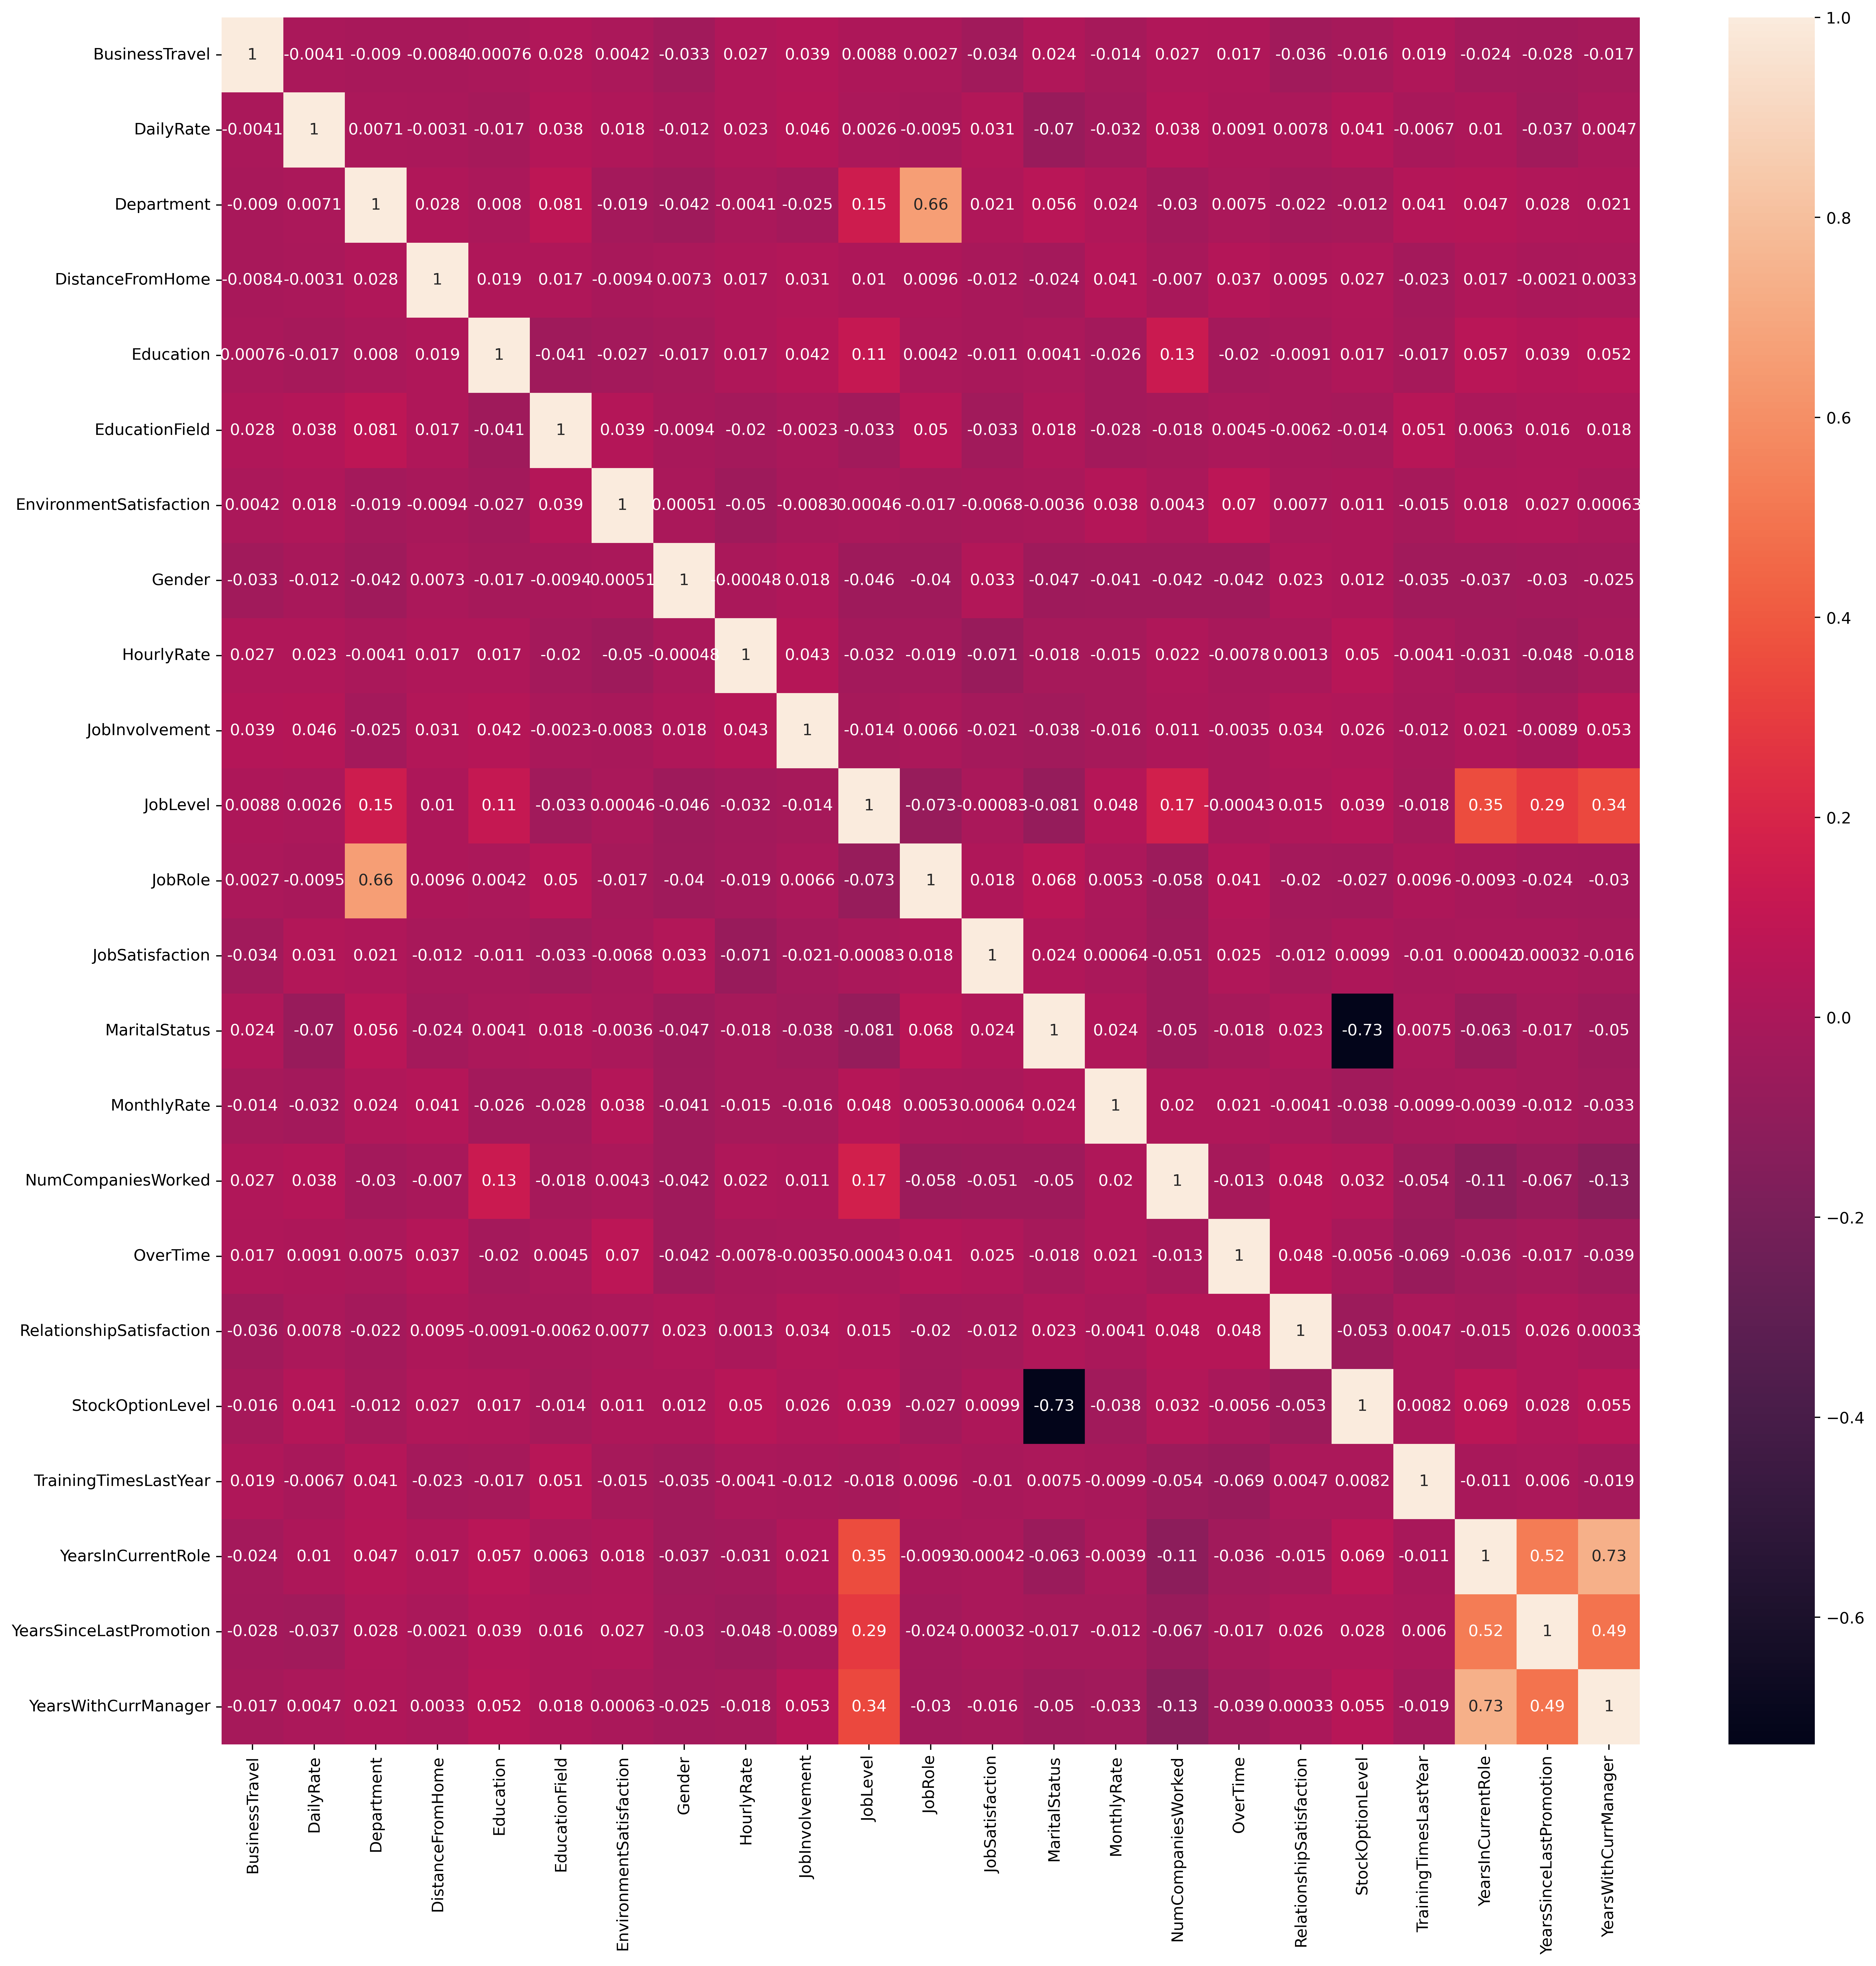

In [85]:
plt.figure(figsize=(20,20), dpi=400)
sns.heatmap(x.corr(), annot=True)

### Observation - 
Data is some what ready for model building after Standardization
- After checking VIF, Decided to drop below features 
    - PerformanceRating
    - WorkLifeBalance
    - TotalWorkingYears
    - YearsAtCompany
    - PercentSalaryHike 
    - MonthlyIncome
    - Age
- After dropping columns with high mulit-collinearity, we can see that there is remarkable drop in skewness of features.
- There are no highly correlated features in columns

In [86]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[ 0.59004834,  0.74252653,  1.40151234, ...,  0.29310556,
        -1.00473473,  0.55033658],
       [-0.91319439, -1.2977746 , -0.49381714, ...,  0.88690912,
        -0.09256018,  0.90802291],
       [ 0.59004834,  1.41436324, -0.49381714, ..., -1.74026166,
        -1.00473473, -1.67742779],
       ...,
       [ 0.59004834, -1.60518328, -0.49381714, ..., -0.3522726 ,
        -1.00473473,  0.04620601],
       [-0.91319439,  0.54667746,  1.40151234, ...,  0.71820528,
        -1.00473473,  1.05446715],
       [ 0.59004834, -0.43256792, -0.49381714, ...,  0.01118553,
        -0.09256018, -0.31148032]])

In [87]:
x.columns

Index(['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [88]:
x_scaled = pd.DataFrame(x1,columns=x.columns)

In [89]:
x_scaled

BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0           0.590048   0.742527    1.401512         -1.505350  -0.891688   
1          -0.913194  -1.297775   -0.493817          0.252002  -1.868426   
2           0.590048   1.414363   -0.493817         -1.031607  -0.891688   
3          -0.913194   1.461466   -0.493817         -0.695482   1.061787   
4           0.590048  -0.524295   -0.493817         -1.031607  -1.868426   
...              ...        ...         ...               ...        ...   
1465       -0.913194   0.202082   -0.493817          1.397995  -0.891688   
1466        0.590048  -0.469754   -0.493817         -0.041631  -1.868426   
1467        0.590048  -1.605183   -0.493817         -0.434763   0.085049   
1468       -0.913194   0.546677    1.401512         -1.031607   0.085049   
1469        0.590048  -0.432568   -0.493817          0.252002   0.085049   

      EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0          -0.958897                -0.660531 -1.224745    1.383138   
1          -0.958897                 0.254625  0.816497   -0.240677   
2           1.239443                 1.169781  0.816497    1.284725   
3          -0.958897                 1.169781 -1.224745   -0.486709   
4           0.704083                -1.575686  0.816497   -1.274014   
...              ...                      ...       ...         ...   
1465        0.704083                 0.254625  0.816497   -1.224807   
1466        0.704083                 1.169781  0.816497   -1.175601   
1467       -0.958897                -0.660531  0.816497    1.038693   
1468        0.704083                 1.169781  0.816497   -0.142264   
1469        0.704083                -0.660531  0.816497    0.792660   

      JobInvolvement  JobLevel   JobRole  JobSatisfaction  MaritalStatus  \
0           0.379672  0.112298  1.032716         1.153254       1.236820   
1          -1.026167  0.112298  0.626374        -0.660853      -0.133282   
2          -1.026167 -1.094180 -0.998992         0.246200       1.236820   
3           0.379672 -1.094180  0.626374         0.246200      -0.133282   
4           0.379672 -1.094180 -0.998992        -0.660853      -0.133282   
...              ...       ...       ...              ...            ...   
1465        1.785511  0.112298 -0.998992         1.153254      -0.133282   
1466       -1.026167  0.968307 -1.811675        -1.567907      -0.133282   
1467        1.785511  0.112298 -0.186309        -0.660853      -0.133282   
1468       -1.026167  0.112298  1.032716        -0.660853      -0.133282   
1469        1.785511  0.112298 -0.998992         0.246200      -0.133282   

      MonthlyRate  NumCompaniesWorked  OverTime  RelationshipSatisfaction  \
0        0.726020            1.671048  1.591746                 -1.584178   
1        1.488876           -0.586545 -0.628241                  1.191438   
2       -1.674841            1.293830  1.591746                 -0.658973   
3        1.243211           -0.586545  1.591746                  0.266233   
4        0.325900            1.752202 -0.628241                  1.191438   
...           ...                 ...       ...                       ...   
1465    -0.284329            0.788791 -0.628241                  0.266233   
1466     1.004010            0.788791 -0.628241                 -1.584178   
1467    -1.284418           -0.586545  1.591746                 -0.658973   
1468    -0.150393            0.022051 -0.628241                  1.191438   
1469    -0.574124            0.022051 -0.628241                 -1.584178   

      StockOptionLevel  TrainingTimesLastYear  YearsInCurrentRole  \
0            -1.056106              -2.130765            0.293106   
1             0.471284               0.278639            0.886909   
2            -1.056106               0.278639           -1.740262   
3            -1.056106               0.278639            0.886909   
4             0.471284               0.278639           -

# Model Building and Parameter Tuning

In [90]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=43)

In [92]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [93]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7619047619047619
Cross-val-score= 0.7806967984934087


roc_auc_score 0.630492213570634


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       232
           1       0.43      0.40      0.42        62

    accuracy                           0.76       294
   macro avg       0.64      0.63      0.63       294
weighted avg       0.76      0.76      0.76       294



[[199  33]
 [ 37  25]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


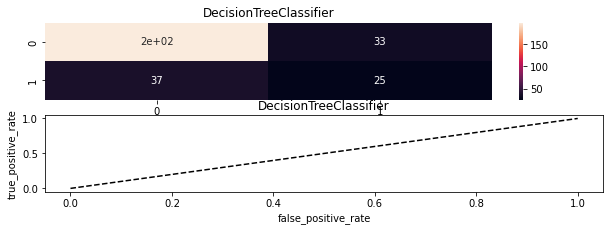

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8129251700680272
Cross-val-score= 0.863102998696219


roc_auc_score 0.5564516129032258


              precision    recall  f1-score   support

           0       0.81      1.00      0.89       232
           1       1.00      0.11      0.20        62

    accuracy                           0.81       294
   macro avg       0.90      0.56      0.55       294
weighted avg       0.85      0.81      0.75       294



[[232   0]
 [ 55   7]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


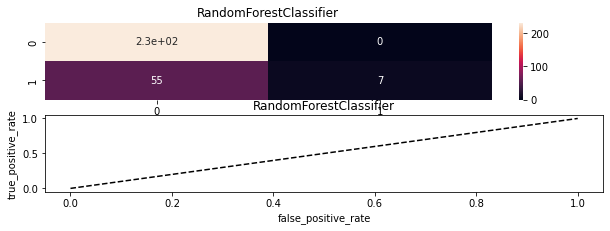

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.782312925170068
Cross-val-score= 0.8613863537592353


roc_auc_score 0.5311457174638488


              precision    recall  f1-score   support

           0       0.80      0.97      0.88       232
           1       0.43      0.10      0.16        62

    accuracy                           0.78       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.72      0.78      0.72       294



[[224   8]
 [ 56   6]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


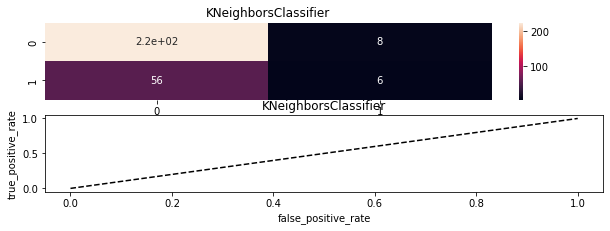

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.7925170068027211
Cross-val-score= 0.8264088077647399


roc_auc_score 0.6794354838709677


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       232
           1       0.51      0.48      0.50        62

    accuracy                           0.79       294
   macro avg       0.69      0.68      0.68       294
weighted avg       0.79      0.79      0.79       294



[[203  29]
 [ 32  30]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


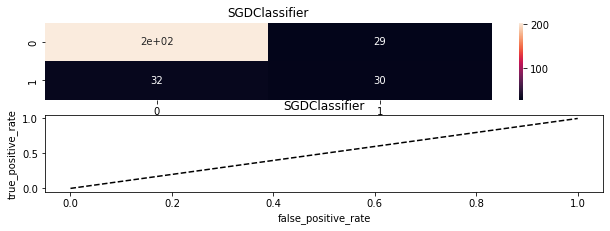

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.8367346938775511
Cross-val-score= 0.873279733449225


roc_auc_score 0.6542686318131257


              precision    recall  f1-score   support

           0       0.85      0.97      0.90       232
           1       0.75      0.34      0.47        62

    accuracy                           0.84       294
   macro avg       0.80      0.65      0.69       294
weighted avg       0.83      0.84      0.81       294



[[225   7]
 [ 41  21]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


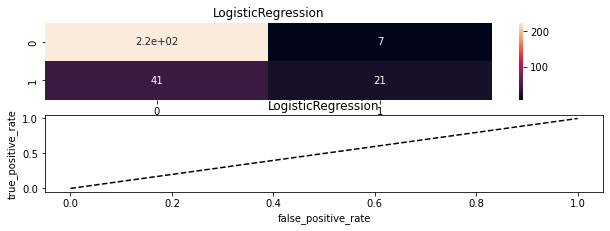

In [94]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10)
    # ---------------------------------------------------------------------------------------------------------
    
    cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    # ---------------------------------------------------------------------------------------------------------
        
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

 ------------------------ Results with Random State 0 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  77.552513  81.292517  65.102041
1      RandomForestClassifier  85.546864  85.374150  56.122449
2        KNeighborsClassifier  84.442271  85.034014  56.734694
3               SGDClassifier  83.423149  82.653061  64.285714
4          LogisticRegression  86.482689  87.755102  68.163265
5                   LinearSVC  85.885847  87.414966  65.510204
6  GradientBoostingClassifier  86.394321  86.054422  63.877551
7                  GaussianNB  84.698682  85.034014  68.979592
 ------------------------ Results with Random State 1 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  80.096335  75.170068  57.225307
1      RandomForestClassifier  86.308851  81.632653  56.699299
2        KNeighborsClassifier  85.373026  80.612245  54.763296
3               SGDClas

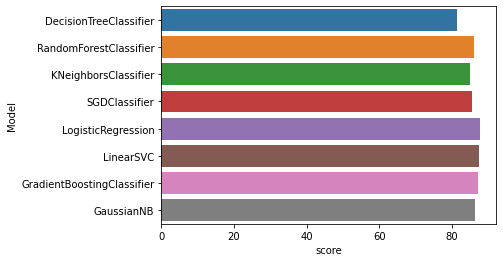

In [95]:
for i in [0, 1, 101, 47]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    
    
    # To Prevent Data Leakages, We are scaling data for each train and test. To keep, 
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.fit_transform(x_test)
    
    
    dtc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    lg=LogisticRegression()
    knc=KNeighborsClassifier()
    sgc=SGDClassifier()
    svc = LinearSVC()
    gbc = GradientBoostingClassifier()
    gnb = GaussianNB()
    
    
    seed=7
    #prepare models
    models=[]
    models.append(('DecisionTreeClassifier',dtc))
    models.append(('RandomForestClassifier',rfc))
    models.append(('KNeighborsClassifier',knc))
    models.append(('SGDClassifier',sgc))
    models.append(('LogisticRegression',lg))
    models.append(('LinearSVC', svc))
    models.append(('GradientBoostingClassifier', gbc))
    models.append(('GaussianNB', gnb))
    
    
    
    #evaluate each model in turn ----------------------------------------------------------------------------------------
    Model=[]
    cvs=[]
    score=[]
    rocscore=[]
    for name,model in models:
        # print('**************',name,'***********')
        # print('\n')
        Model.append(name)
        model.fit(x_train,y_train)
        # print(model)
        pred=model.predict(x_test)
        # print('\n')
        acc=accuracy_score(y_test,pred)
        # print('accuracy score',acc)
        score.append(acc*100)
        kfold=model_selection.KFold(n_splits=10)
        # ---------------------------------------------------------------------------------------------------------

        cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
        # print('Cross-val-score=',cv)
        cvs.append(cv*100)
        # print('\n')
        # ---------------------------------------------------------------------------------------------------------

        false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
        roc_auc=roc_auc_score(y_test,pred)
        # print('roc_auc_score',roc_auc)
        rocscore.append(roc_auc*100)
        # print('\n')
        # print(classification_report(y_test,pred))
        # print('\n')
        cm=confusion_matrix(y_test,pred)
        # print(cm)
        # print('\n')
        # plt.figure(figsize=(10,15))
        # plt.subplot(911)
        # plt.title(name)
        # print(sns.heatmap(cm,annot=True))
        # plt.subplot(912)
        # plt.title(name)

        # plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
        # plt.plot([0,1],[0,1],'k--')
        # plt.xlabel('false_positive_rate')
        # plt.ylabel('true_positive_rate')
        # plt.show()

        
    result=pd.DataFrame({'Model':Model, 'cvs' :cvs, 'score' :score, 'rocscore' :rocscore}, columns=['Model', 'cvs','score','rocscore'])
    print(f'\033[1m ------------------------ Results with Random State {i} ------------------------')
    print(result)
    sns.barplot(y='Model',x='score',data=result)
    result['score']

# -----------------------------------Parameter Tuning-------------------------------------

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# 1. GradientBoostingClassifier

In [97]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [98]:
clf_gb.best_score_

0.8639576995509198

In [99]:
clf_gb.best_params_

{'n_estimators': 500}

In [100]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.107559      0.038867         0.003742        0.001185   

  param_n_estimators                 params  split0_test_score  \
0                500  {'n_estimators': 500}           0.847458   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.872881           0.889831           0.847458           0.822034   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.889831           0.880342           0.871795           0.863248   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.854701         0.863958        0.020339                1

In [101]:
pred=clf_gb.predict(x_test)
print(f'Accuracy of GradientBoostingClassifier is {round(accuracy_score(pred,y_test)*100,4)}')

Accuracy of GradientBoostingClassifier is 81.2925


# 2. Logistic Regression

In [102]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=lg,param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [103]:
clf_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [104]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

0.8537592351151673

In [105]:
clf_lr_df = pd.DataFrame(clf_lr.cv_results_)
clf_lr_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.000316      0.000485         0.000000        0.000000   0.001   
1        0.013719      0.003031         0.000899        0.001513   0.001   
2        0.000399      0.000488         0.000000        0.000000    0.01   
3        0.019162      0.005230         0.000955        0.001717    0.01   
4        0.000061      0.000184         0.000000        0.000000     0.1   
5        0.019371      0.002749         0.001327        0.001949     0.1   
6        0.000057      0.000170         0.000000        0.000000       1   
7        0.022724      0.004220         0.000832        0.001538       1   
8        0.000975      0.001158         0.000000        0.000000      10   
9        0.021704      0.004238         0.001081        0.001705      10   
10       0.000369      0.000951         0.000000        0.000000     100   
11       0.022816      0.005826         0.001538        0.001872     100   
12       0.000000      0.000000         0.000000        0.000000    1000   
13       0.020244      0.003424         0.001257        0.002020    1000   

   param_penalty                         params  split0_test_score  \
0             l1  {'C': 0.001, 'penalty': 'l1'}                NaN   
1             l2  {'C': 0.001, 'penalty': 'l2'}           0.847458   
2             l1   {'C': 0.01, 'penalty': 'l1'}                NaN   
3             l2   {'C': 0.01, 'penalty': 'l2'}           0.847458   
4             l1    {'C': 0.1, 'penalty': 'l1'}                NaN   
5             l2    {'C': 0.1, 'penalty': 'l2'}           0.855932   
6             l1      {'C': 1, 'penalty': 'l1'}                NaN   
7             l2      {'C': 1, 'penalty': 'l2'}           0.855932   
8             l1     {'C': 10, 'penalty': 'l1'}                NaN   
9             l2     {'C': 10, 'penalty': 'l2'}           0.855932   
10            l1    {'C': 100, 'penalty': 'l1'}                NaN   
11            l2    {'C': 100, 'penalty': 'l2'}           0.864407   
12            l1   {'C': 1000, 'penalty': 'l1'}                NaN   
13            l2   {'C': 1000, 'penalty': 'l2'}           0.855932   

    split1_test_score  split2_test_score  split3_test_score  \
0                 NaN                NaN                NaN   
1            0.847458           0.847458           0.847458   
2                 NaN                NaN                NaN   
3            0.847458           0.847458           0.847458   
4                 NaN                NaN                NaN   
5            0.847458           0.864407           0.847458   
6                 NaN                NaN                NaN   
7            0.855932           0.855932           0.847458   
8                 NaN                NaN                NaN   
9            0.838983           0.881356           0.855932   
10                NaN                NaN                NaN   
11           0.847458           0.847458           0.847458   
12                NaN                NaN                NaN   
13           0.847458           0.855932           0.855932   

    split4_test_score  split5_test_score  split6_test_score  \
0                 NaN                NaN                NaN   
1            0.847458           0.847458           0.854701   
2                 NaN                NaN                NaN   
3            0.847458           0.847458           0.854701   
4                 NaN                NaN                NaN   
5            0.847458           0.830508           0.837607   
6                 NaN                NaN                NaN   
7            0.847458           0.847458           0.820513   
8                 NaN                NaN                NaN   
9            0.847458           0.830508           0.854701   
10                NaN                NaN                NaN   
11           0.847458           0.847458           0.854701   
12                NaN                NaN       

In [106]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.826530612244898

# 3. KNN

In [107]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [108]:
clf_knn.best_score_

0.8477908155874256

In [109]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 14}

In [110]:
clf_knn_df = pd.DataFrame(clf_knn.cv_results_)
clf_knn_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_jobs  \
0        0.002766      0.001506         0.015914        0.002457           -1   
1        0.001773      0.000375         0.014759        0.000488           -1   
2        0.003354      0.002147         0.013276        0.001439           -1   
3        0.001294      0.001464         0.015516        0.002329           -1   
4        0.002450      0.001802         0.015470        0.001404           -1   
5        0.001779      0.000949         0.016571        0.001260           -1   
6        0.001881      0.000787         0.016196        0.001145           -1   
7        0.002077      0.001532         0.016513        0.001189           -1   
8        0.002042      0.001443         0.016462        0.000803           -1   
9        0.001788      0.002414         0.015426        0.002820           -1   
10       0.002109      0.002254         0.015843        0.002875           -1   
11       0.002608      0.001131         0.016154        0.001643           -1   
12       0.002462      0.001968         0.014420        0.002308           -1   
13       0.002278      0.001888         0.016151        0.001718           -1   
14       0.002986      0.001682         0.033076        0.053726           -1   
15       0.003050      0.002188         0.014827        0.001882           -1   
16       0.003123      0.002508         0.014604        0.002231           -1   
17       0.002632      0.001607         0.016674        0.001226           -1   
18       0.003503      0.002107         0.014863        0.002424           -1   
19       0.002692      0.002083         0.015878        0.002444           -1   
20       0.003615      0.001825         0.015362        0.001990           -1   
21       0.002478      0.002671         0.014787        0.002736           -1   
22       0.002813      0.002429         0.014613        0.002428           -1   
23       0.003485      0.002571         0.013933        0.001946           -1   
24       0.002702      0.002375         0.015261        0.002511           -1   
25       0.002842      0.002265         0.015630        0.002761           -1   
26       0.003155      0.001438         0.015979        0.002355           -1   
27       0.001906      0.001761         0.016187        0.002417           -1   
28       0.001633      0.000849         0.017597        0.002114           -1   
29       0.001950      0.002254         0.016145        0.001593           -1   
30       0.002022      0.001799         0.014567        0.002571           -1   
31       0.002731      0.001218         0.015176        0.001295           -1   
32       0.002031      0.000560         0.016331        0.000675           -1   
33       0.001752      0.000828         0.016117        0.001843           -1   
34       0.001614      0.000704         0.016443        0.000910           -1   
35       0.001710      0.000499         0.016179        0.001454           -1   
36       0.001541      0.000799         0.016777        0.000951           -1   
37       0.001931      0.002278         0.016100        0.002722           -1   
38       0.002496      0.002062         0.015850        0.001979           -1   
39       0.001769      0.001038         0.016952        0.000941           -1   
40       0.003405      0.002590         0.015659        0.002689           -1   
41       0.001793      0.002373         0.015391        0.002838           -1   
42       0.002380      0.002363         0.015468        0.002202           -1   
43       0.002312      0.001754         0.016610        0.001857           -1   
44       0.002681      0.001892         0.016202        0.001949           -1   
45       0.001526      0.001613         0.018065        0.001498           -1   
46       0.002832      0.001885         0.015869        0.002010           -1   
47       0.002421      0.002343         0.016016        0.002001           -1   
48       0.001666      0.001504    

In [111]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.8027210884353742

# 4. Random Forcast¶

In [112]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

In [113]:
clf_rf.best_score_

0.8596986817325801

In [114]:
clf_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [115]:
clf_rf_df = pd.DataFrame(clf_rf.cv_results_)
clf_rf_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.590319      0.818696         0.056412        0.006071   
1       0.320770      0.033766         0.057207        0.004304   
2       0.305136      0.009092         0.056651        0.004521   

  param_max_features param_n_estimators  \
0               auto                500   
1               sqrt                500   
2               log2                500   

                                          params  split0_test_score  \
0  {'max_features': 'auto', 'n_estimators': 500}           0.864407   
1  {'max_features': 'sqrt', 'n_estimators': 500}           0.864407   
2  {'max_features': 'log2', 'n_estimators': 500}           0.864407   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.847458           0.872881           0.847458           0.864407   
1           0.847458           0.881356           0.847458           0.855932   
2           0.847458           0.881356           0.847458           0.855932   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.855932           0.863248           0.854701           0.863248   
1           0.855932           0.863248           0.871795           0.863248   
2           0.855932           0.854701           0.871795           0.863248   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.846154         0.857989        0.008581                3  
1           0.846154         0.859699        0.010836                1  
2           0.846154         0.858844        0.010860                2

In [116]:
pred=clf_rf.predict(x_test)
print(round(accuracy_score(pred,y_test), 3) * 100, '%')   # actual accuarcy on our test set.

82.3 %


# 5. Gradient Boosting

In [117]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [118]:
clf_gb.best_score_

0.8639576995509198

In [119]:
clf_gb.best_params_

{'n_estimators': 500}

In [120]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.104162      0.041531         0.002607        0.001675   

  param_n_estimators                 params  split0_test_score  \
0                500  {'n_estimators': 500}           0.847458   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.872881           0.889831           0.847458           0.822034   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.889831           0.880342           0.871795           0.863248   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.854701         0.863958        0.020339                1

In [121]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.8129251700680272

# Creating Model For Production, Random Forecast = 82%

In [ ]:
# Save File
import pickle
file = 'HR_analytics'
#save file
save = pickle.dump(pred,open(file,'wb'))